#Investigating the Impact of Contextual Factors on Attendance and Exclusion Patterns: A Python-Based Analysis for the Vale of Glamorgan Schools

A dissertation submitted to Cardiff Metropolitan University for the degree of
BSc Applied Data Science

**Sean Granville (st20215322)**

School of Technologies, Cardiff Metropolitan University

24 June 2024

**Research Question:** Can Machine Learning be used to identify high-risk cohorts experiencing persistent absenteeism and exclusion in Vale of Glamorgan schools, to improve outcomes through better targeted support?

##Table of Contents

1. Introduction
2. Data Pre-Processing
3. Exploratory Data Analysis (EDA)
4. Machine Learning Models
5. Artificial Neural Network (ANN) Classification

#1. Introduction

This project employs Python-based data analysis to investigate the intricate relationships between contextual factors, attendance, exclusion patterns, and academic achievement among students at Vale of Glamorgan School. The study aims to discern significant correlations within the dataset and explore the feasibility of identifying and predicting high-risk factors to enhance the efficiency of support services.

The research begins with a comprehensive literature review, establishing a foundation by synthesizing existing knowledge on attendance, exclusion, and academic achievement. A primary focus is given to understanding the contextual factors that may influence these educational outcomes.

Data is collected from Vale of Glamorgan School, encompassing information on attendance records, exclusion incidents, academic performance, and relevant contextual factors. The dataset is anonymised, cleaned, and pre-processed to ensure data quality.

Exploratory Data Analysis (EDA) is conducted using Python's Pandas, Matplotlib, and Seaborn libraries. Descriptive statistics and visualizations provide insights into the distribution of variables, and initial correlations are explored to form hypotheses.

Statistical analyses, including correlation analysis and regression modelling, are employed to test hypotheses derived from the literature and EDA. Machine learning models and neural network classifiers are implemented to predict learners at risk of persistent absenteeism and exclusion.

The results of the analyses are interpreted, highlighting significant relationships and their implications. Recommendations are provided for improving attendance, reducing exclusions, and enhancing academic engagement based on the findings.

This dissertation contributes to the academic discourse by bridging gaps in existing literature and leveraging Python's analytical and Artificial Intelligence (AI) capabilities to extract meaningful insights from real-world educational data. The study concludes with reflections on the practical implications of the research and avenues for future investigation.

In [81]:
# import required libraries
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np
import geopandas as gpd
import datetime
import time
import shap
import warnings

# ML libraries
from sklearn.model_selection import (train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import tensorflow as tf
from sklearn.neural_network import MLPClassifier
from sklearn.exceptions import ConvergenceWarning
from scipy.stats import uniform

##2. Data Pre-Processing

- Obtain permission and access to the dataset from Vale of Glamorgan Schools.
- Ensure the dataset contains relevant information on attendance, exclusion and contextual factors.
- Clean and preprocess the data to handle missing values and outliers.

In [82]:
# import data to Pandas DataFrame
df = pd.read_csv('/content/drive/MyDrive/DAT6001 Files/final_merged_data.csv')

In [83]:
df.shape

(249259, 30)

In [84]:
# display all columns
pd.set_option('display.max_columns', None)

df.head(5)

,Year,DES_NO,Hashed_UPN,Gender,DOB,NCYearActual,Ethnicity,SENprovision,FSMeligible,PostCode,EALAcquisition,Exclusion_StartDate,Exclusion_Reason,Exclusion_Category,Exclusion_SessionsMissed,PERCENTAGEAUTH,PERCENTAGEUNAUTH,PERCENTAGEATT,PRESENT_SESS,POSSIBLE_SESS,MISS_SESS,AUTHORISED_SESS,UNAUTHORISED_SESS,LSOA Code,LSOA Name (English),LSOA Name (Cymraeg),WIMD 2019 LSOA Rank,WIMD 2019 Overall Decile,WIMD 2019 Overall Quintile,WIMD 2019 Overall Quartile
0,2016,5500,fd9b1490213ef0da4252e7eb7709d9339b824c8cea810f...,M,14/09/1999,11,WBRI,P,0.0,CF632AJ,0,NaN,NaN,NaN,NaN,0.0317,0.0159,0.9524,360.0,378.0,0.0,12.0,6.0,W01001067,Cadoc 1,Catwg 1,195.0,2.0,1.0,1.0
1,2016,5500,a150af01dedf7fcc7c77c8f3ce167687b40df3c5090dd0...,M,27/02/2003,8,WBRI,P,0.0,CF627DA,0,NaN,NaN,NaN,NaN,0.0582,0.0000,0.9418,356.0,378.0,0.0,22.0,0.0,W01001066,Buttrills 4,Buttrills 4,733.0,4.0,2.0,2.0
2,2016,5500,cdff7526b69c3241e37cbb59144e58d72c5631e5925ba5...,M,06/10/1997,13,WBRI,N,0.0,CF642SX,0,NaN,NaN,NaN,NaN,0.0053,0.0582,0.9365,354.0,378.0,0.0,2.0,22.0,W01001078,Cornerswell 4,Cornerswell 4,1671.0,9.0,5.0,4.0
3,2016,5500,ba2a98e30f738ba68cb1d4be8c920018a168eef27b2388...,M,05/10/1998,12,WBRI,N,0.0,CF645RH,0,NaN,NaN,NaN,NaN,0.0000,0.0132,0.9868,375.0,380.0,0.0,0.0,5.0,W01001114,Plymouth (The Vale of Glamorgan) 1,Plymouth (Bro Morgannwg) 1,1899.0,10.0,5.0,4.0
4,2016,5500,f6d8fb93644d5842277cfcf071061558956f05d59790af...,M,23/02/1999,12,WBRI,N,0.0,CF643LX,0,NaN,NaN,NaN,NaN,0.0842,0.1184,0.7974,303.0,380.0,0.0,32.0,45.0,W01001129,Stanwell 1,Stanwell 1,993.0,6.0,3.0,3.0


###Visualise missing values in the DataFrame

<Axes: >

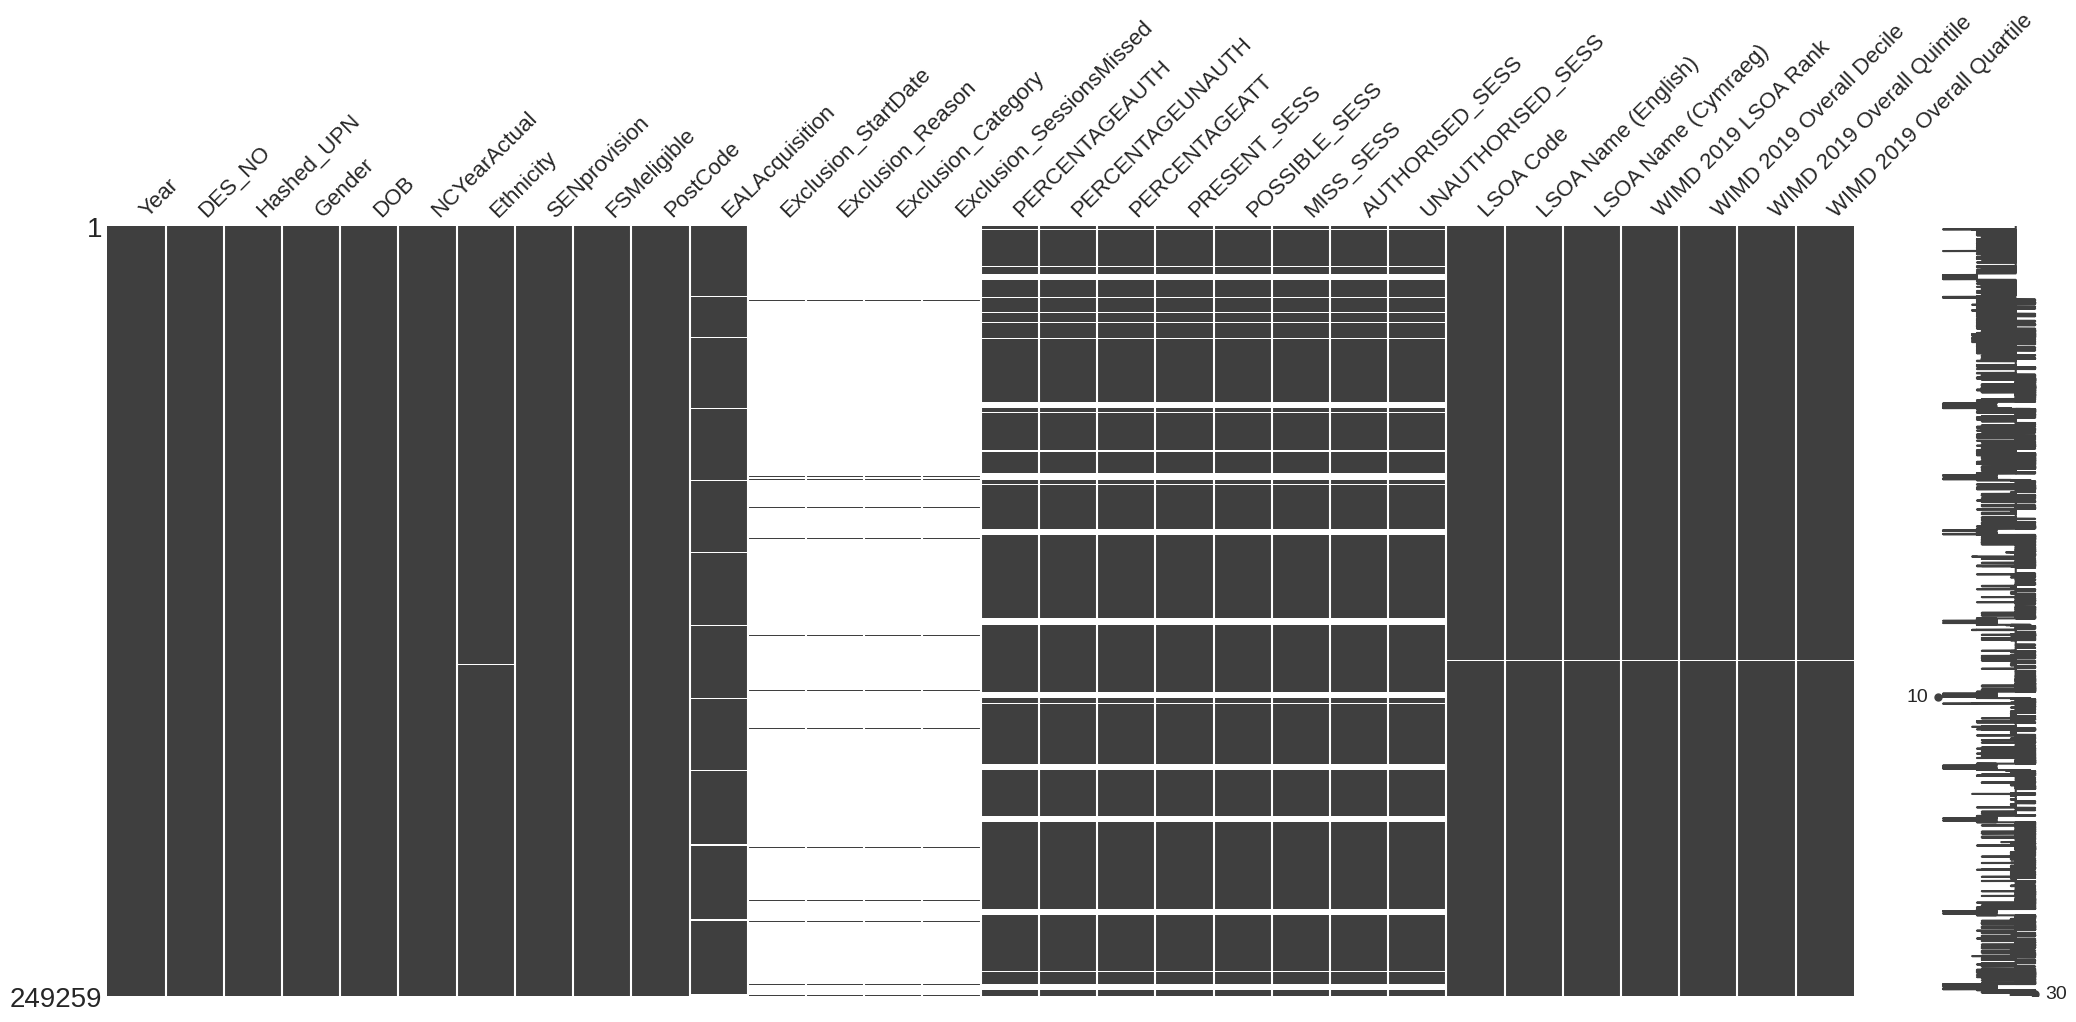

In [85]:
msno.matrix(df)

<Axes: >

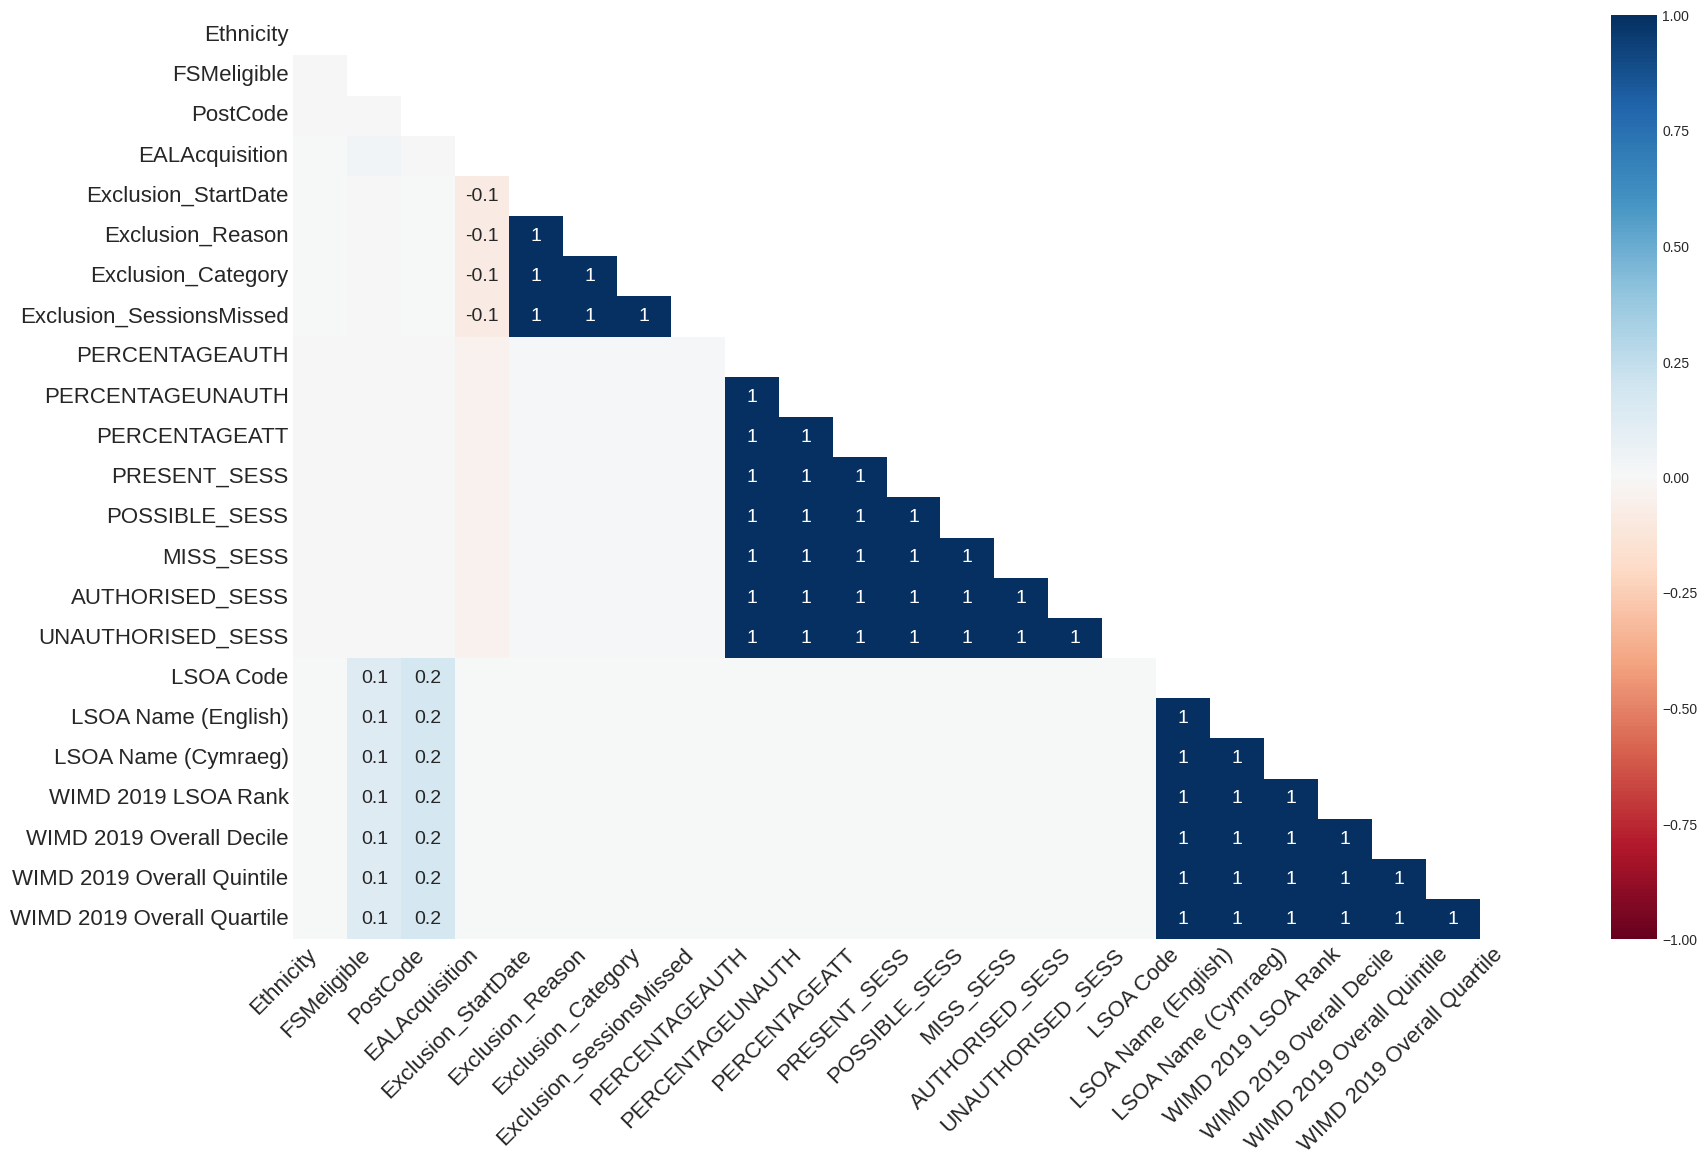

In [86]:
msno.heatmap(df)

<Axes: >

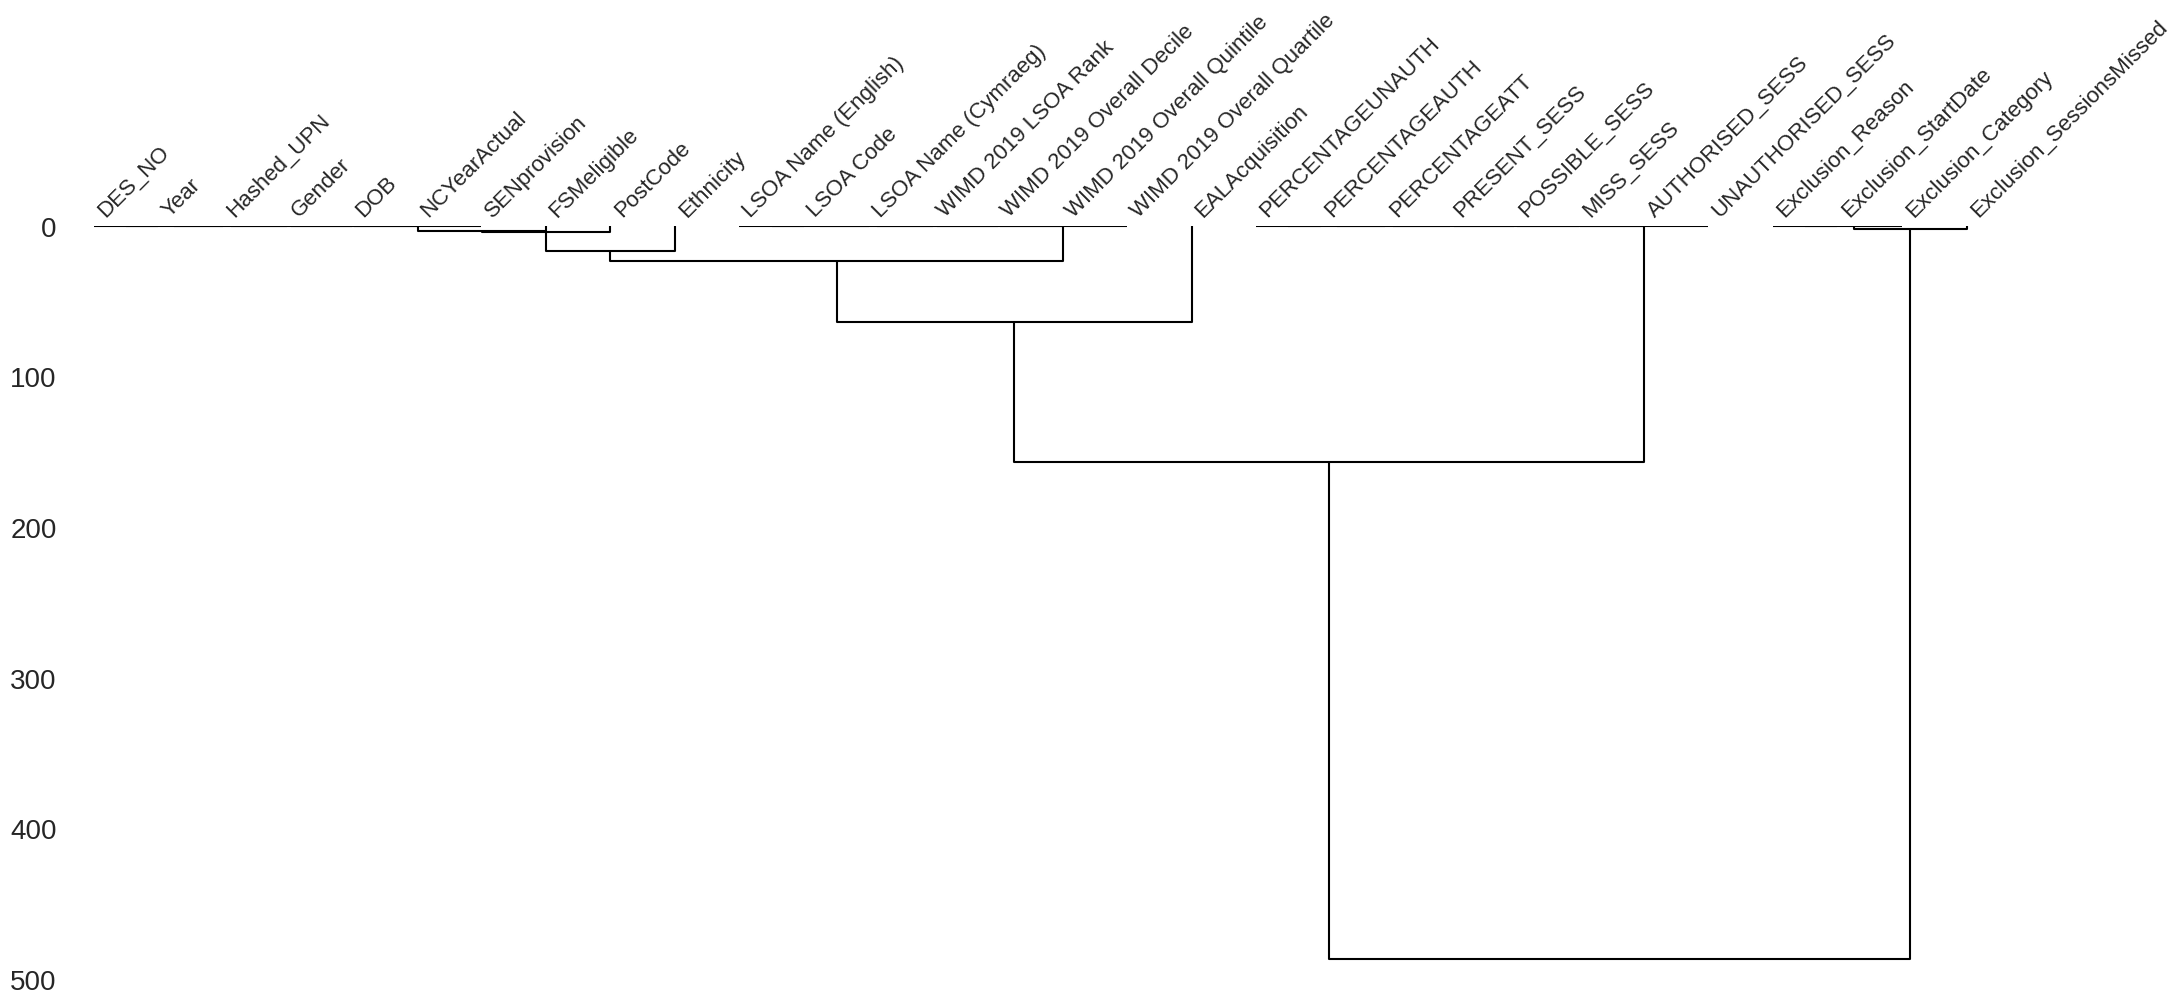

In [87]:
msno.dendrogram(df)

In [88]:
# count of null values in each column
null_counts = df.isnull().sum()
print(null_counts)

Year                               0
DES_NO                             0
Hashed_UPN                         0
Gender                             0
DOB                                0
NCYearActual                       0
Ethnicity                        280
SENprovision                       0
FSMeligible                        9
PostCode                          16
EALAcquisition                  3853
Exclusion_StartDate           244680
Exclusion_Reason              244680
Exclusion_Category            244680
Exclusion_SessionsMissed      244685
PERCENTAGEAUTH                 24104
PERCENTAGEUNAUTH               24104
PERCENTAGEATT                  24104
PRESENT_SESS                   24104
POSSIBLE_SESS                  24104
MISS_SESS                      24104
AUTHORISED_SESS                24104
UNAUTHORISED_SESS              24104
LSOA Code                        512
LSOA Name (English)              512
LSOA Name (Cymraeg)              512
WIMD 2019 LSOA Rank              512
W

In [89]:
# replace null with '0' for 'Exclusion_SessionsMissed' and 'EALAcquisition'
columns_to_fill = ['Exclusion_SessionsMissed', 'EALAcquisition']
df[columns_to_fill] = df[columns_to_fill].fillna(0)

In [90]:
# replace null with 'N/A' for 'Exclusion_Reason' and 'Exclusion_Category'
columns_to_fill = ['Exclusion_Reason', 'Exclusion_Category']
df[columns_to_fill] = df[columns_to_fill].fillna('N/A')

In [91]:
# drop 'Exclusion_StartDate' and 'LSOA Name (Cymraeg)' columns
df.drop(columns=['Exclusion_StartDate', 'LSOA Name (Cymraeg)'], inplace=True)

In [92]:
# drop rows where 'Ethnicity', 'FSMeligible' and 'PostCode' are null
columns_to_check = ['Ethnicity', 'FSMeligible', 'PostCode']

# drop rows with missing values
for column in columns_to_check:
    df = df.dropna(subset=[column])

<Axes: title={'center': 'Null Value Counts for PERCENTAGEAUTH by DES_NO (Counts > 10)'}, xlabel='DES_NO', ylabel='Null Value Count'>

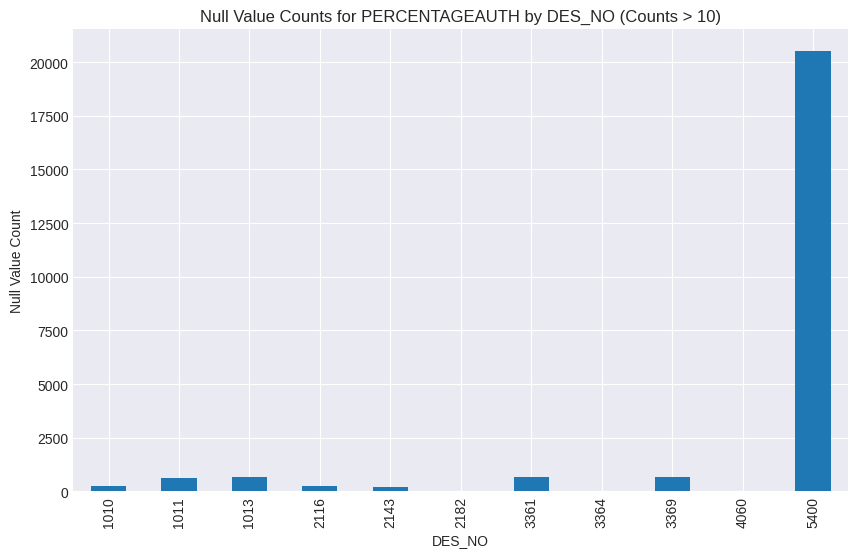

In [93]:
# find missing attendance data by school
null_counts = df[df['PERCENTAGEAUTH'].isnull()].groupby('DES_NO').size()
null_counts_filtered = null_counts[null_counts > 10]
null_counts_filtered.plot(kind='bar', figsize=(10, 6), xlabel='DES_NO', ylabel='Null Value Count', title='Null Value Counts for PERCENTAGEAUTH by DES_NO (Counts > 10)')

In [94]:
# delete all Stanwell School records as we do not have attendance data
df['DES_NO'] = df['DES_NO'].astype(str)
df = df[df['DES_NO'] != '5400']

<Axes: title={'center': 'Null Value Counts for PERCENTAGEAUTH by Year (Counts > 10)'}, xlabel='Year', ylabel='Null Value Count'>

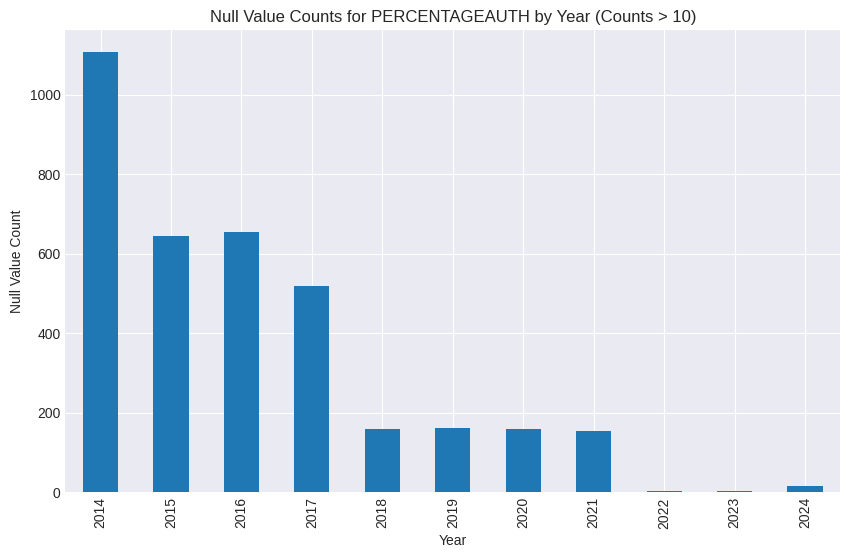

In [95]:
# visualise missing attendance data by data collection year
null_counts_filtered_by_year = df[df['PERCENTAGEAUTH'].isnull()].groupby('Year').size()

null_counts_filtered_by_year.plot(kind='bar', figsize=(10, 6), xlabel='Year', ylabel='Null Value Count', title='Null Value Counts for PERCENTAGEAUTH by Year (Counts > 10)')


In [96]:
# drop 2014, include only past 10 years
df['Year'] = df['Year'].astype(str)
df = df[df['Year'] != '2014']

In [97]:
# drop all rows where there is null attendance data
columns_to_check = ['PERCENTAGEAUTH']

# drop rows with missing values
for column in columns_to_check:
    df = df.dropna(subset=[column])

In [98]:
# drop all rows where 'LSOA Code' is null
columns_to_check = ['LSOA Code']

# drop rows with missing values
for column in columns_to_check:
    df = df.dropna(subset=[column])

<Axes: >

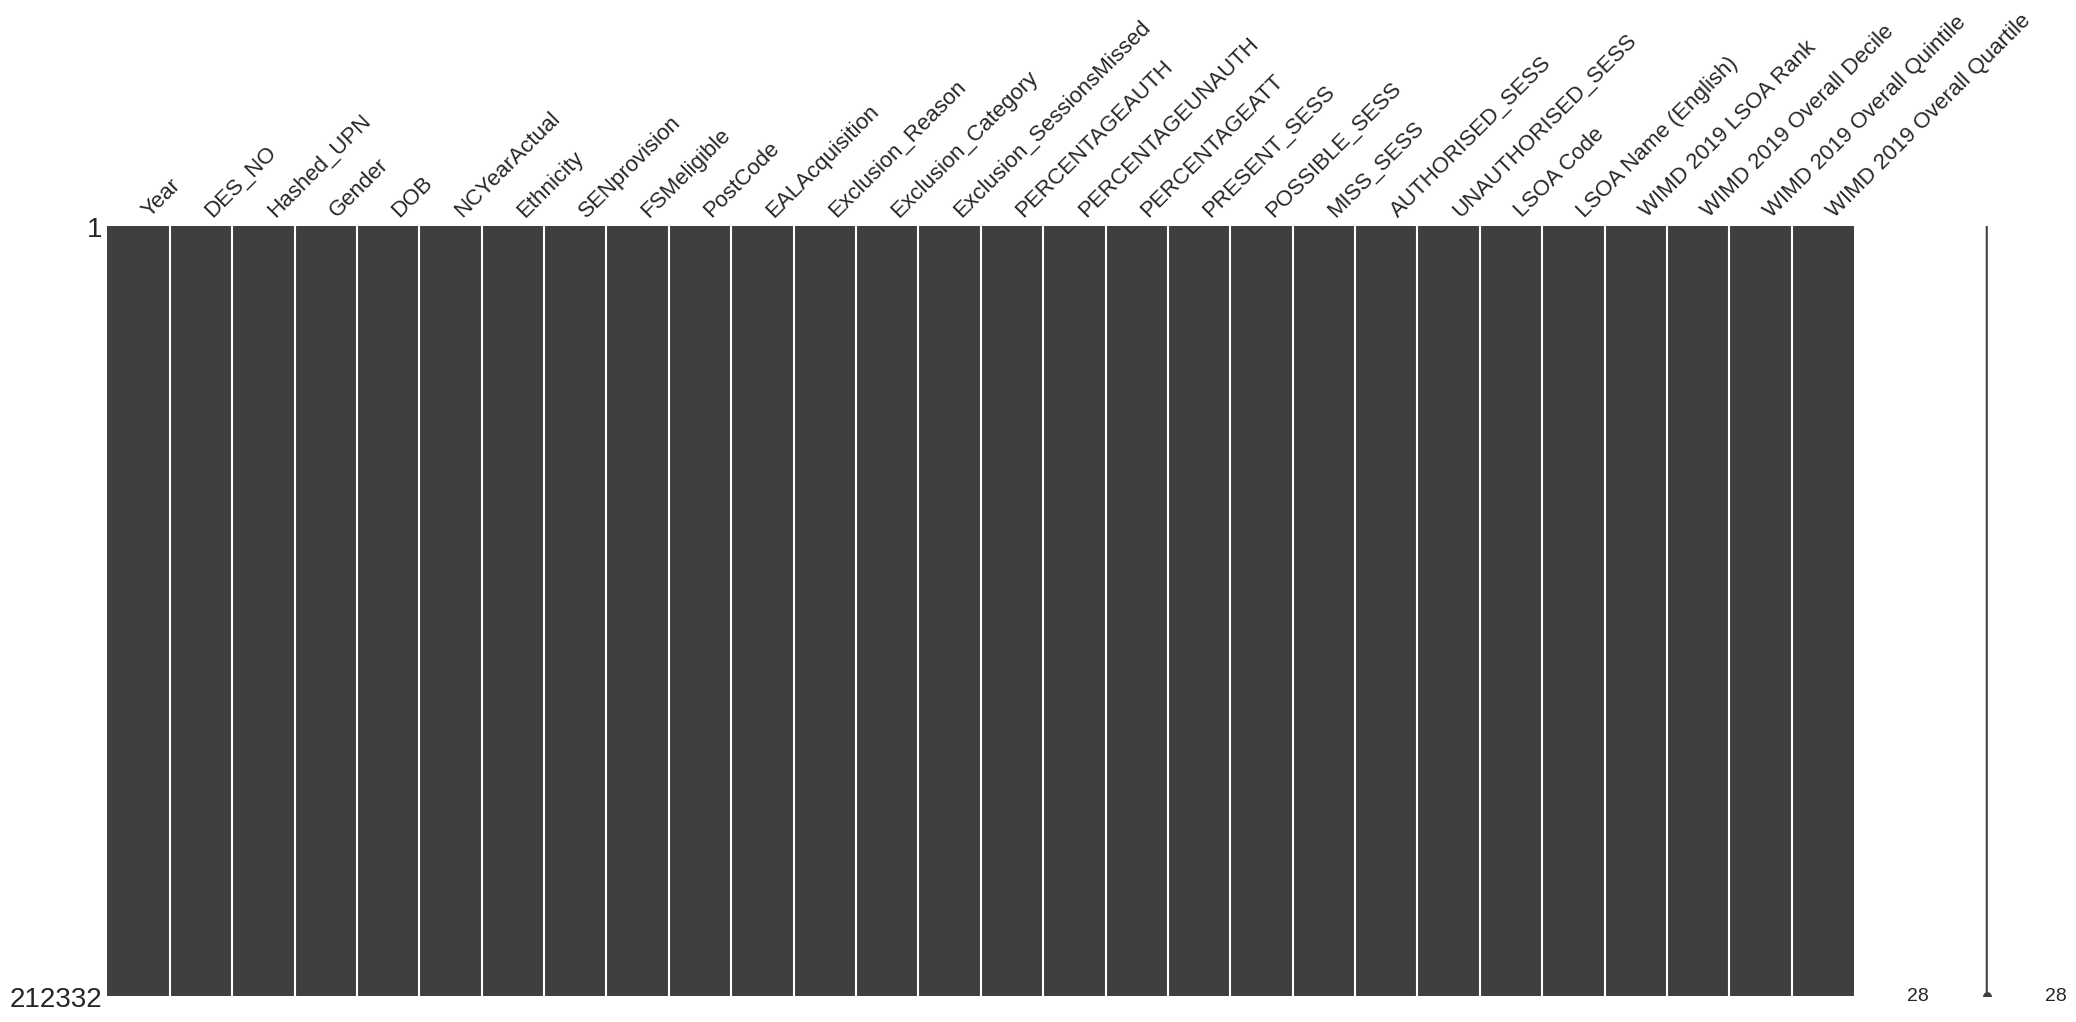

In [99]:
msno.matrix(df)

In [100]:
# count of null values in each column
null_counts = df.isnull().sum()
print(null_counts)

Year                          0
DES_NO                        0
Hashed_UPN                    0
Gender                        0
DOB                           0
NCYearActual                  0
Ethnicity                     0
SENprovision                  0
FSMeligible                   0
PostCode                      0
EALAcquisition                0
Exclusion_Reason              0
Exclusion_Category            0
Exclusion_SessionsMissed      0
PERCENTAGEAUTH                0
PERCENTAGEUNAUTH              0
PERCENTAGEATT                 0
PRESENT_SESS                  0
POSSIBLE_SESS                 0
MISS_SESS                     0
AUTHORISED_SESS               0
UNAUTHORISED_SESS             0
LSOA Code                     0
LSOA Name (English)           0
WIMD 2019 LSOA Rank           0
WIMD 2019 Overall Decile      0
WIMD 2019 Overall Quintile    0
WIMD 2019 Overall Quartile    0
dtype: int64


In [101]:
df.shape

(212332, 28)

In [102]:
df.dtypes

Year                           object
DES_NO                         object
Hashed_UPN                     object
Gender                         object
DOB                            object
NCYearActual                   object
Ethnicity                      object
SENprovision                   object
FSMeligible                   float64
PostCode                       object
EALAcquisition                 object
Exclusion_Reason               object
Exclusion_Category             object
Exclusion_SessionsMissed      float64
PERCENTAGEAUTH                float64
PERCENTAGEUNAUTH              float64
PERCENTAGEATT                 float64
PRESENT_SESS                  float64
POSSIBLE_SESS                 float64
MISS_SESS                     float64
AUTHORISED_SESS               float64
UNAUTHORISED_SESS             float64
LSOA Code                      object
LSOA Name (English)            object
WIMD 2019 LSOA Rank           float64
WIMD 2019 Overall Decile      float64
WIMD 2019 Ov

In [103]:
### convert DoB feature to age feature

# convert 'DOB' to datetime format
df['DOB'] = pd.to_datetime(df['DOB'], errors='coerce')

# calculate age
current_date = pd.Timestamp.now()
df['Age'] = df['DOB'].apply(lambda x: current_date.year - x.year - ((current_date.month, current_date.day) < (x.month, x.day)))

# Adjust age for cases where the birthday hasn't occurred yet in the current year
df.loc[df['DOB'].dt.month > current_date.month, 'Age'] -= 1
df.loc[(df['DOB'].dt.month == current_date.month) & (df['DOB'].dt.day > current_date.day), 'Age'] -= 1

# drop the 'DOB' feature
df.drop(columns=['DOB'], inplace=True)

<ipython-input-103-0b695ad8185e>:4: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['DOB'] = pd.to_datetime(df['DOB'], errors='coerce')


##3. Exploratory Data Analysis (EDA)

In [104]:
# import functions from the functions notebook
%run '/content/drive/MyDrive/Colab Notebooks/Year3_Project_Functions.ipynb'

In [105]:
# convert the FSMeligible to boolean
df['FSMeligible'] = df['FSMeligible'].astype(bool)

# create all SEN column
df['Any_SEN'] = df['SENprovision'].apply(lambda x: False if x == 'N' else True)

# remove spaces from 'EALAcquisition'
df['EALAcquisition'] = df['EALAcquisition'].str.replace(' ', '')

# create all EAL column
df['Any_EAL'] = df['EALAcquisition'].apply(lambda x: False if x == '0' else True)

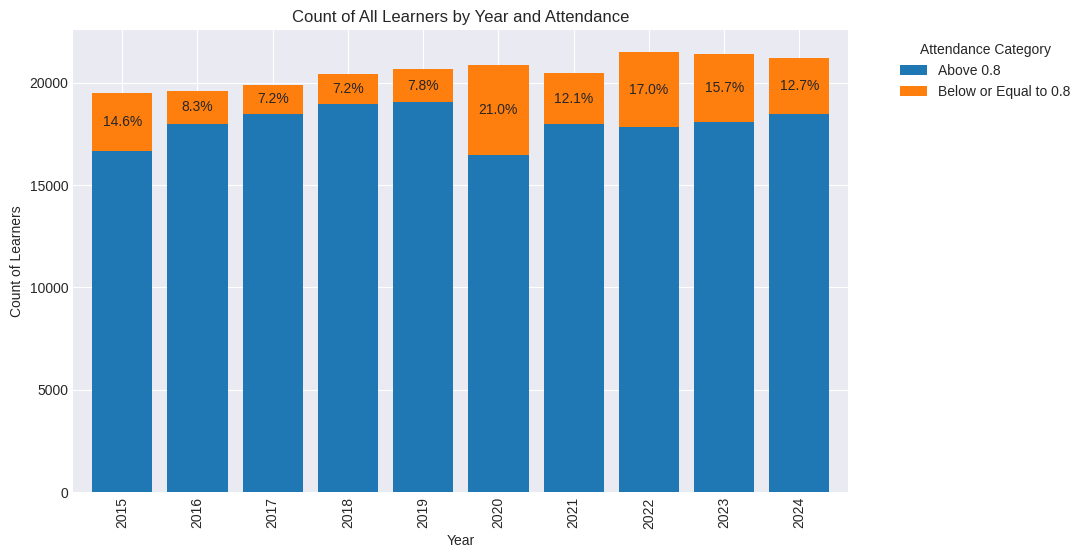

In [106]:
# define attendance categories
df['Attendance_Category'] = df['PERCENTAGEATT'].apply(lambda x: 'Above 0.8' if x > 0.8 else 'Below or Equal to 0.8')

# group by year and attendance category, count unique learners
learner_counts_by_year_and_attendance = df.groupby(['Year', 'Attendance_Category'])['Hashed_UPN'].nunique().unstack()

# calculate proportion of total for each attendance category
total_per_year = learner_counts_by_year_and_attendance.sum(axis=1)
proportion = learner_counts_by_year_and_attendance.div(total_per_year, axis=0)

# plot stacked bar chart with wider bars
ax = learner_counts_by_year_and_attendance.plot(kind='bar', stacked=True, figsize=(10, 6), width=0.8, xlabel='Year', ylabel='Count of Learners', title='Count of All Learners by Year and Attendance')

# add text labels for proportion of total for 'Below or Equal to 0.8' category only
for i, year in enumerate(learner_counts_by_year_and_attendance.index):
    for j, (above, below) in enumerate(zip(learner_counts_by_year_and_attendance.loc[year], proportion.loc[year])):
        if j == 1:
            ax.text(i, sum(learner_counts_by_year_and_attendance.loc[year].iloc[:j+1]) - learner_counts_by_year_and_attendance.loc[year].iloc[j]/2, f'{below:.1%}', ha='center', va='center')

ax.legend(title='Attendance Category', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [107]:
# Make a copy of the dataframe and adjust column names and Gender, Ethnicity cols for plotting
df2 = df
df2 = df2.rename(columns={'Any_EAL': 'EAL'})
df2 = df2.rename(columns={'Any_SEN': 'ALN'})
df2 = df2.rename(columns={'FSMeligible': 'FSM'})
df2['Male'] = np.where(df2['Gender'] == 'M ', True, False)
df2['Non-WBRI'] = np.where(df2['Ethnicity'] == 'WBRI', False, True)

In [108]:
clustered_categories = ['ALN', 'EAL', 'FSM', 'Male', 'Non-WBRI']

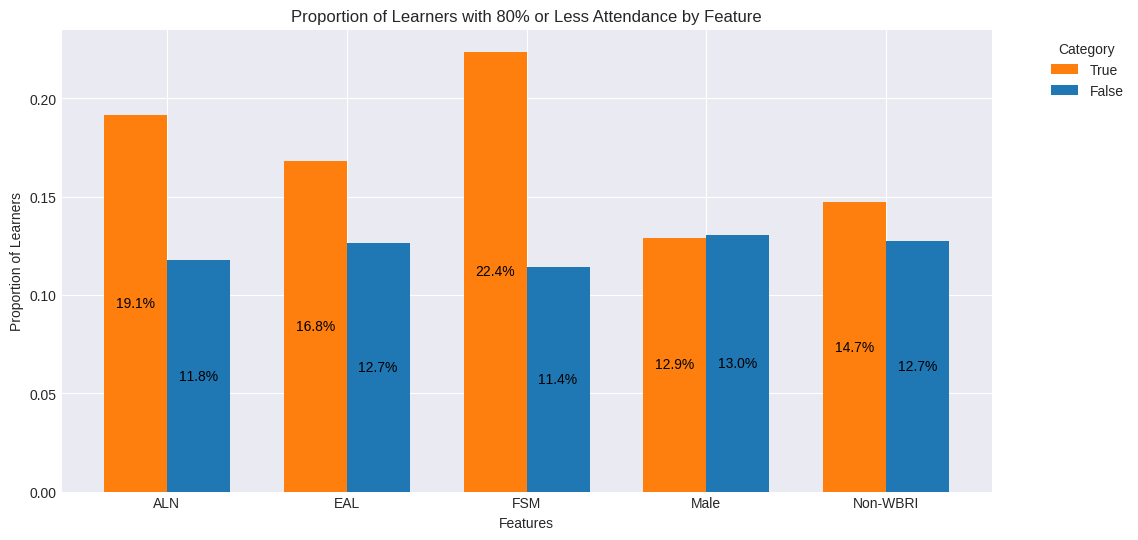

In [109]:
plot_clustered_attendance_proportions(df2, clustered_categories)

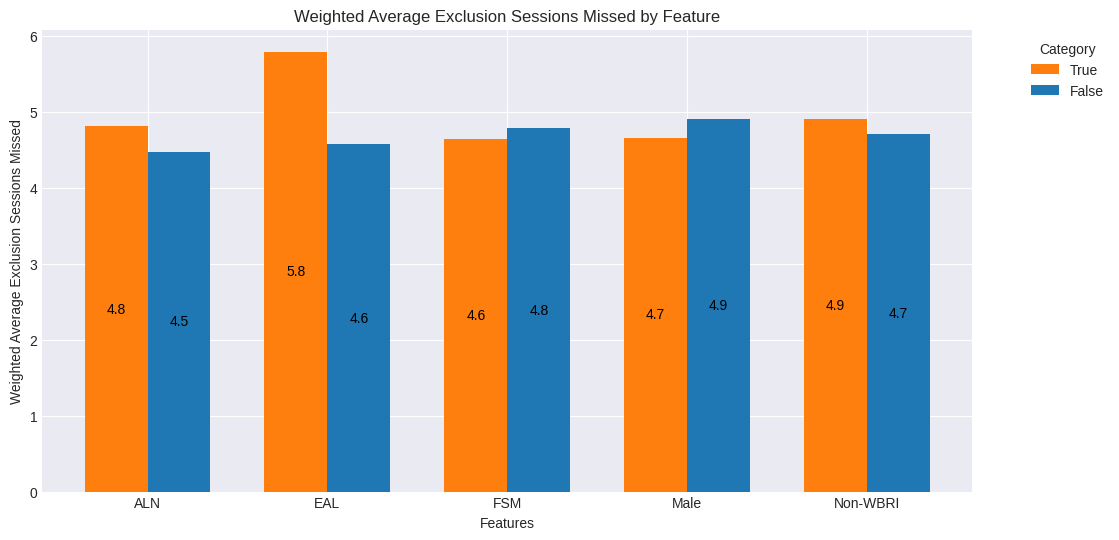

In [110]:
plot_weighted_avg_exclusion_sessions(df2, clustered_categories)

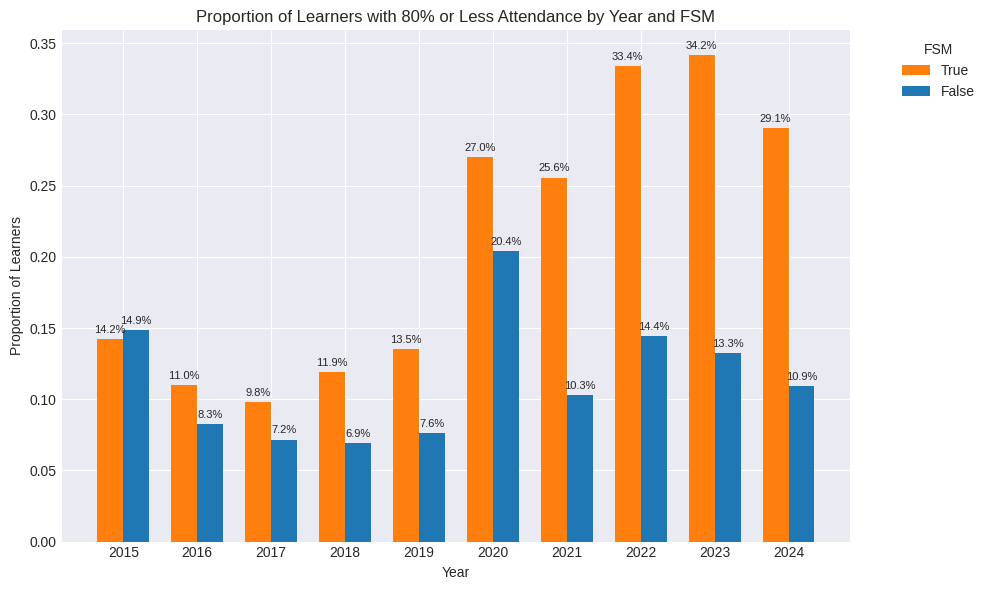

In [111]:
plot_attendance_proportions_with_year(df2, 'FSM')

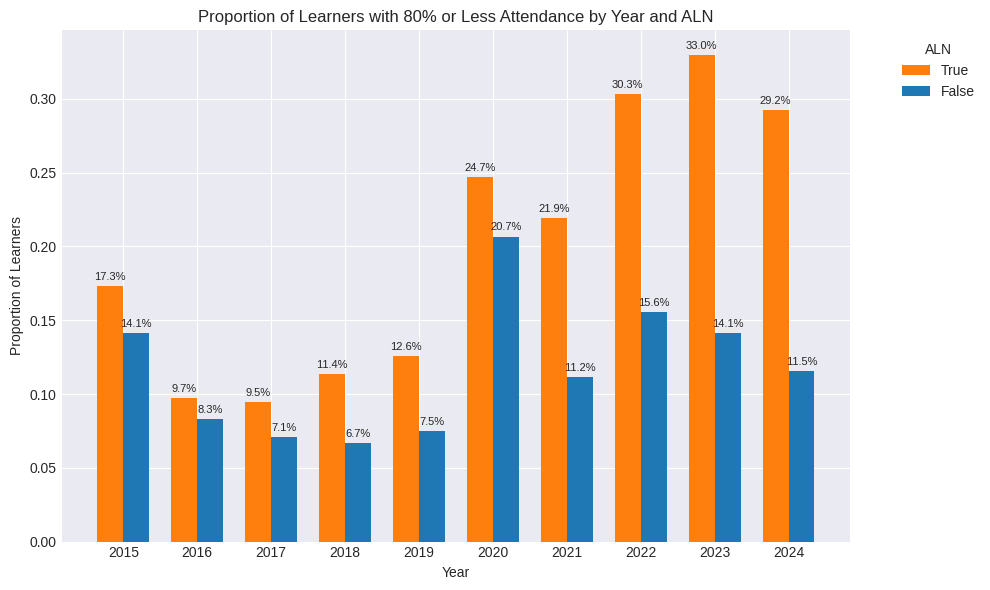

In [112]:
plot_attendance_proportions_with_year(df2, 'ALN')

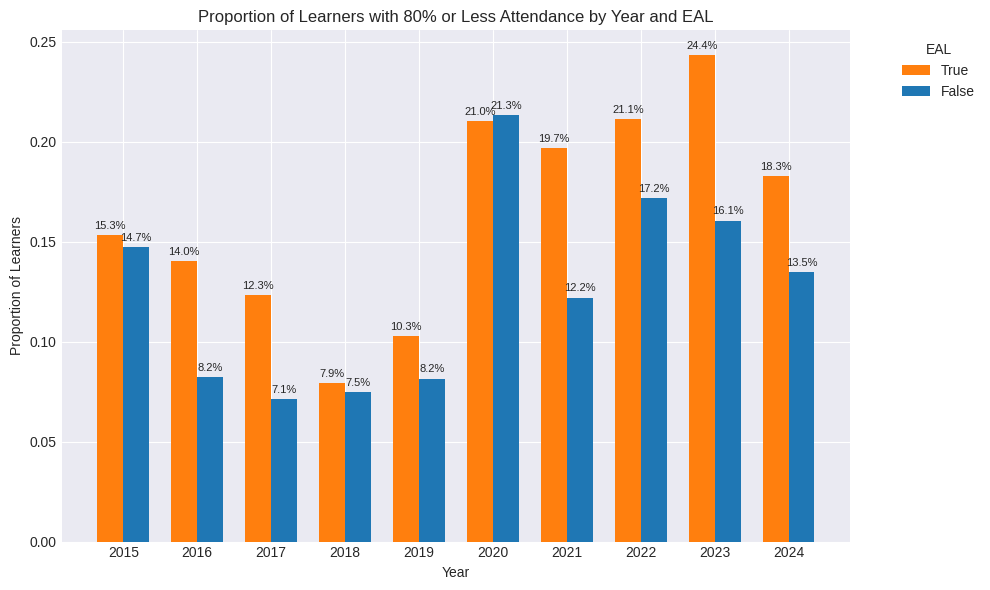

In [113]:
plot_attendance_proportions_with_year(df2, 'EAL')

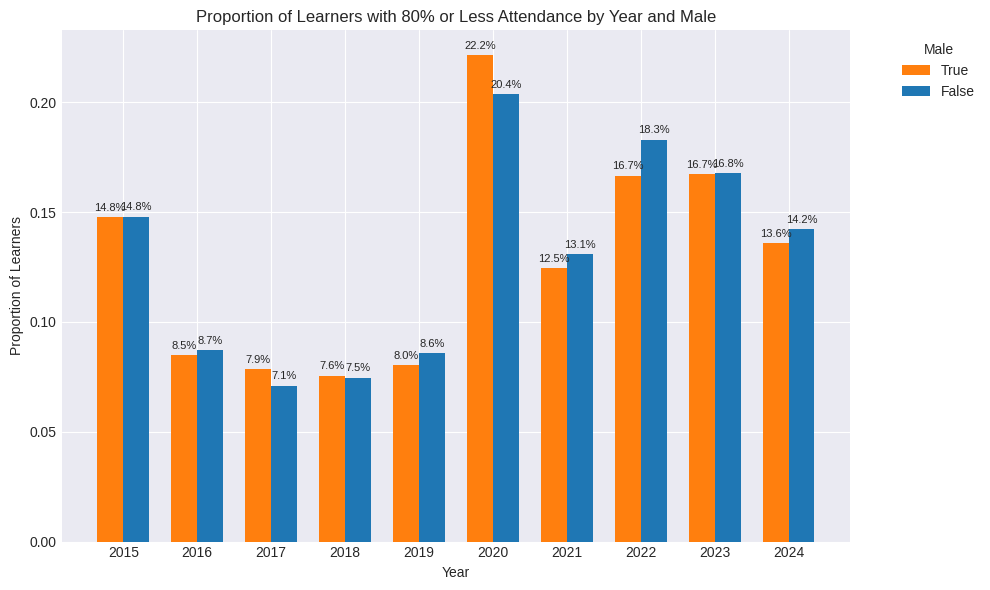

In [114]:
plot_attendance_proportions_with_year(df2,  'Male')

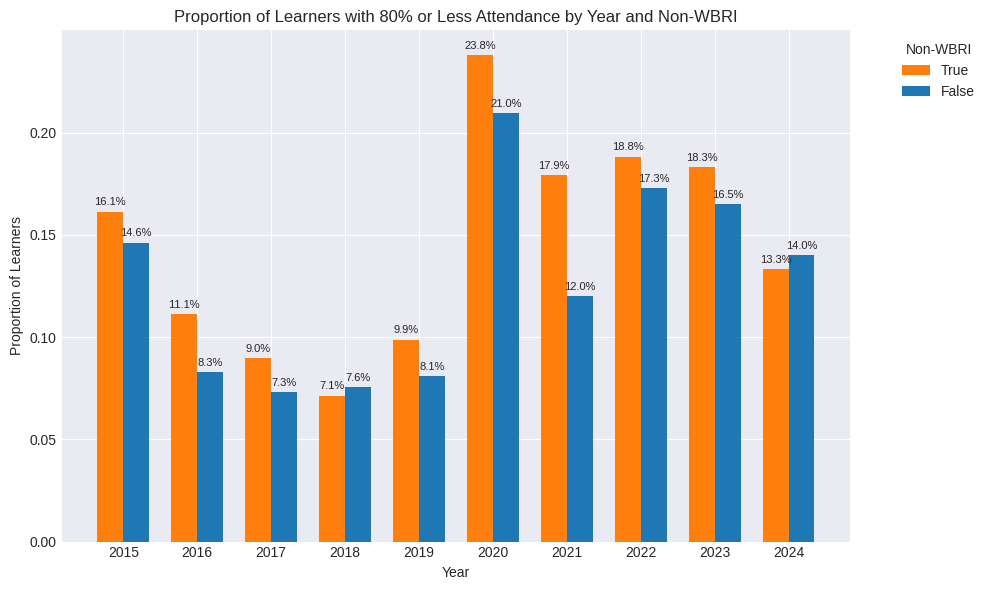

In [115]:
plot_attendance_proportions_with_year(df2, 'Non-WBRI')

In [116]:
### WIMD Bins
num_bins = 10
df['WIMD 2019 LSOA Rank Bins'] = pd.cut(df['WIMD 2019 LSOA Rank'], bins=num_bins, labels=False)

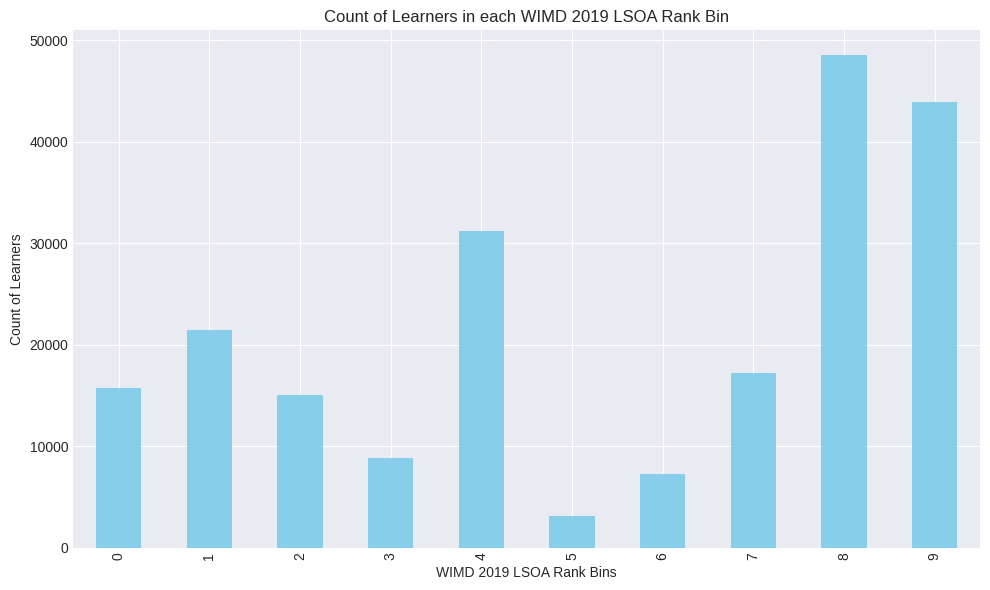

In [117]:
# Group by 'WIMD 2019 LSOA Rank Bins' and count the occurrences of 'UPN_Hashed' in each bin
bin_counts = df.groupby('WIMD 2019 LSOA Rank Bins')['Hashed_UPN'].count()

plt.figure(figsize=(10, 6))
bin_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Learners in each WIMD 2019 LSOA Rank Bin')
plt.xlabel('WIMD 2019 LSOA Rank Bins')
plt.ylabel('Count of Learners')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

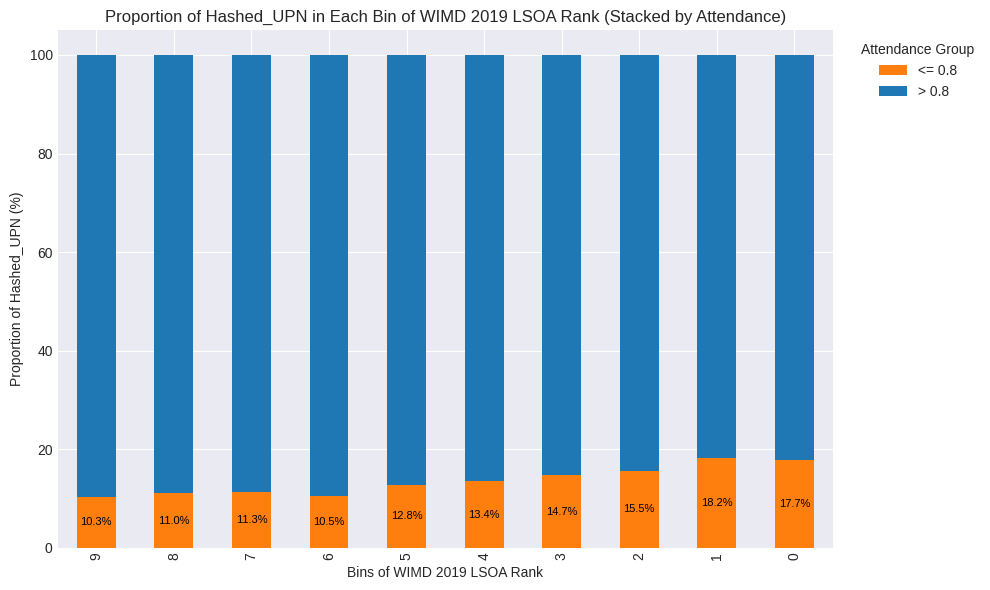

In [118]:
# filter the DataFrame to include only learners with 'PERCENTAGEATT' <= 0.8 and > 0.8
df['AttGroup'] = pd.cut(df['PERCENTAGEATT'], bins=[-np.inf, 0.8, np.inf], labels=['<= 0.8', '> 0.8'])

# group the filtered DataFrame by 'WIMD 2019 LSOA Rank Bins' and 'AttGroup', count the occurrences of 'Hashed_UPN'
bin_attendance_counts = df.groupby(['WIMD 2019 LSOA Rank Bins', 'AttGroup'])['Hashed_UPN'].count().unstack()

# normalise the counts for proportions
bin_attendance_proportions = bin_attendance_counts.div(bin_attendance_counts.sum(axis=1), axis=0) * 100

# reverse the order of rows in the DataFrame
bin_attendance_proportions = bin_attendance_proportions.iloc[::-1]


bars = bin_attendance_proportions.plot(kind='bar', stacked=True, color=['#ff7f0e', '#1f77b4'], figsize=(10, 6))

for bar in bars.patches[:len(bin_attendance_proportions['<= 0.8'])]:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height / 2, f'{height:.1f}%', ha='center', va='center', color='black', fontsize=8)

plt.title('Proportion of Hashed_UPN in Each Bin of WIMD 2019 LSOA Rank (Stacked by Attendance)')
plt.xlabel('Bins of WIMD 2019 LSOA Rank')
plt.ylabel('Proportion of Hashed_UPN (%)')
plt.xticks(rotation=90)
plt.legend(title='Attendance Group', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [119]:
# read WIMD shape files
shapefile = "/content/drive/MyDrive/DAT6001 Files/wimd2019_overall.shp"

# read shapefile
gdf = gpd.read_file(shapefile)

In [120]:
# rename LSOA column in df to merge dataframes
df.rename(columns={'LSOA Code': 'lsoa_code'}, inplace=True)

# merge geo spatial dataframe with df
merged_df = pd.merge(df, gdf[['lsoa_code', 'map_group', 'geometry']], how='left', on='lsoa_code')

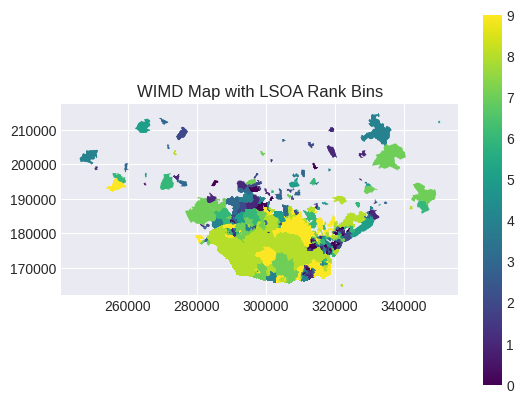

In [121]:
# Create a GeoDataFrame from merged_df
gdf_merged = gpd.GeoDataFrame(merged_df, geometry='geometry')

# Plot the GeoDataFrame, shading based on the 'map_group' column
gdf_merged.plot(column='WIMD 2019 LSOA Rank Bins', cmap='viridis', legend=True)
plt.title('WIMD Map with LSOA Rank Bins')
ax.axis('off')
plt.show()

In [122]:
pip install --upgrade mapclassify

In [123]:
# replace string values in NCY
replace_values = {'N1': -2, 'N2': -1, 'R': 0}
df['NCYearActual'] = df['NCYearActual'].replace(replace_values)

In [124]:
# convert data type of 'NCYearActual' column to integer
df['NCYearActual'] = df['NCYearActual'].astype(int)

In [125]:
# create new 'Exclusion' column
df['Exclusion'] = np.where(df['Exclusion_SessionsMissed'] != 0, 1, 0)

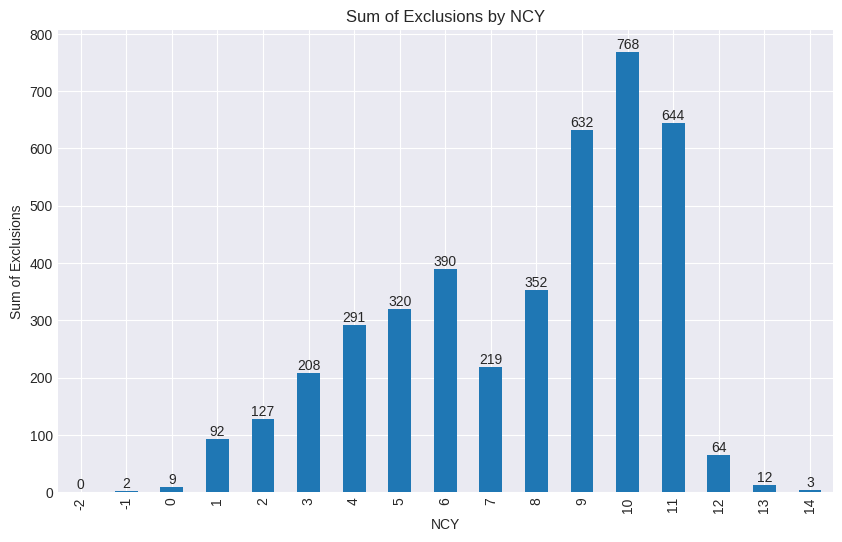

In [126]:
# bar chart that shows sum of exclusions by NCY
exclusions_by_year = df.groupby('NCYearActual')['Exclusion'].sum()

exclusions_by_year = df.groupby('NCYearActual')['Exclusion'].sum()

fig, ax = plt.subplots(figsize=(10, 6))
exclusions_by_year.plot(kind='bar', ax=ax)

for i, (idx, value) in enumerate(exclusions_by_year.items()):
    ax.text(i, value + 0.5, f'{value}', ha='center', va='bottom', fontsize=10)

ax.set_xlabel('NCY')
ax.set_ylabel('Sum of Exclusions')
ax.set_title('Sum of Exclusions by NCY')

plt.show()

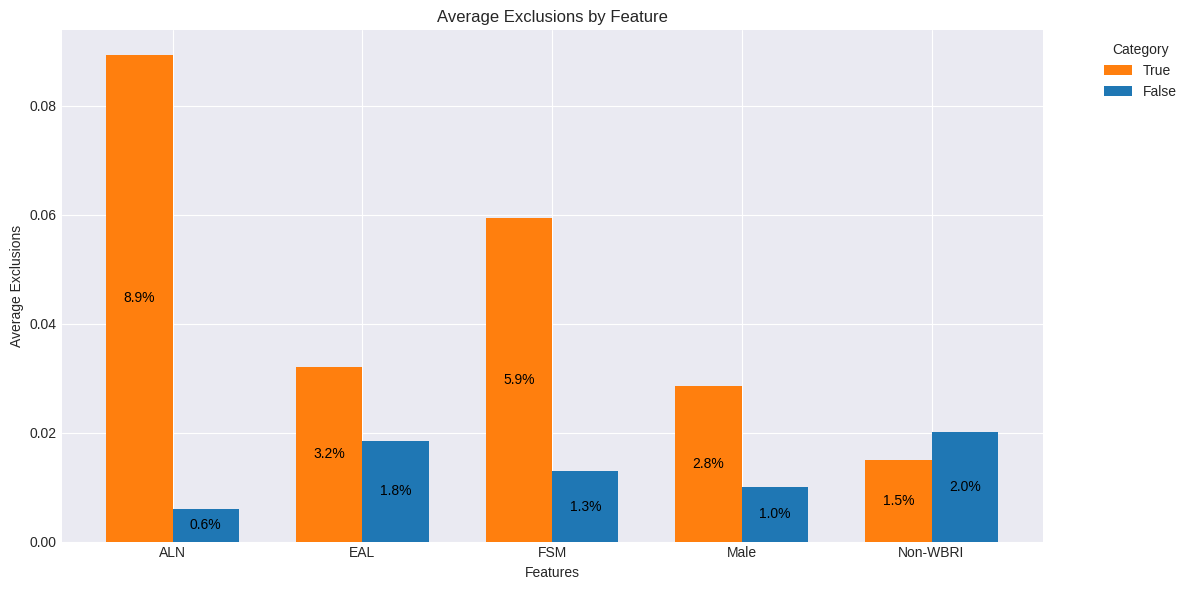

In [127]:
# create new 'Exclusions' column in df2
df2['Exclusions'] = np.where(df2['Exclusion_SessionsMissed'] != 0, 1, 0)

plot_clustered_avg_exclusions(df2, clustered_categories)

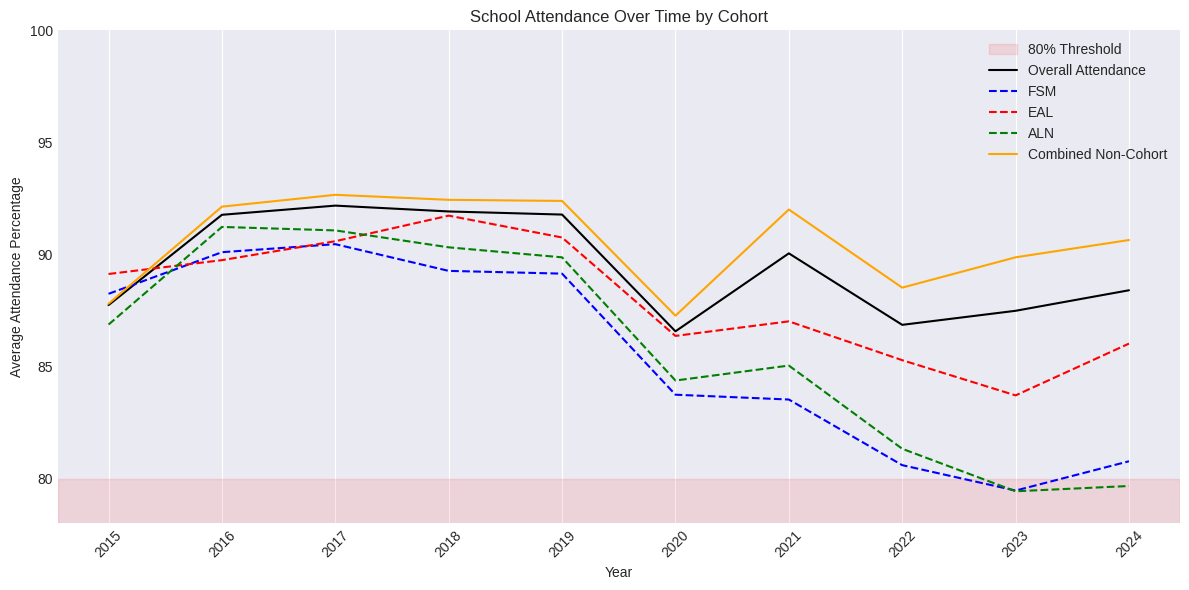

In [128]:
# combined non-cohorts columns
df2['Non_FSM'] = ~df2['FSM']
df2['Non_EAL'] = ~df2['EAL']
df2['Non_ALN'] = ~df2['ALN']

# average attendance for each group by year
grouped = df2.groupby('Year').agg({
    'PERCENTAGEATT': 'mean'
}).reset_index()

# separate calculations for each cohort and non-cohort group
grouped['FSM'] = df2[df2['FSM']].groupby('Year')['PERCENTAGEATT'].mean().values
grouped['Non_FSM'] = df2[df2['Non_FSM']].groupby('Year')['PERCENTAGEATT'].mean().values
grouped['EAL'] = df2[df2['EAL']].groupby('Year')['PERCENTAGEATT'].mean().values
grouped['Non_EAL'] = df2[df2['Non_EAL']].groupby('Year')['PERCENTAGEATT'].mean().values
grouped['ALN'] = df2[df2['ALN']].groupby('Year')['PERCENTAGEATT'].mean().values
grouped['Non_ALN'] = df2[df2['Non_ALN']].groupby('Year')['PERCENTAGEATT'].mean().values

# combined non-cohort average
grouped['Combined_Non_Cohort'] = df2[df2['Non_FSM'] & df2['Non_EAL'] & df2['Non_ALN']].groupby('Year')['PERCENTAGEATT'].mean().values
grouped[['PERCENTAGEATT', 'FSM', 'Non_FSM', 'EAL', 'Non_EAL', 'ALN', 'Non_ALN', 'Combined_Non_Cohort']] *= 100

plt.figure(figsize=(12, 6))
plt.axhspan(0, 80, color='red', alpha=0.1, label='80% Threshold')

plt.plot(grouped['Year'], grouped['PERCENTAGEATT'], label='Overall Attendance', color='black')
plt.plot(grouped['Year'], grouped['FSM'], label='FSM', linestyle='--', color='blue')
plt.plot(grouped['Year'], grouped['EAL'], label='EAL', linestyle='--', color='red')
plt.plot(grouped['Year'], grouped['ALN'], label='ALN', linestyle='--', color='green')
plt.plot(grouped['Year'], grouped['Combined_Non_Cohort'], label='Combined Non-Cohort', linestyle='-', color='orange')

plt.xlabel('Year')
plt.ylabel('Average Attendance Percentage')
plt.title('School Attendance Over Time by Cohort')
plt.legend()
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.yticks(range(70, 101, 5))
plt.ylim(78, 100)
plt.tight_layout()
plt.show()

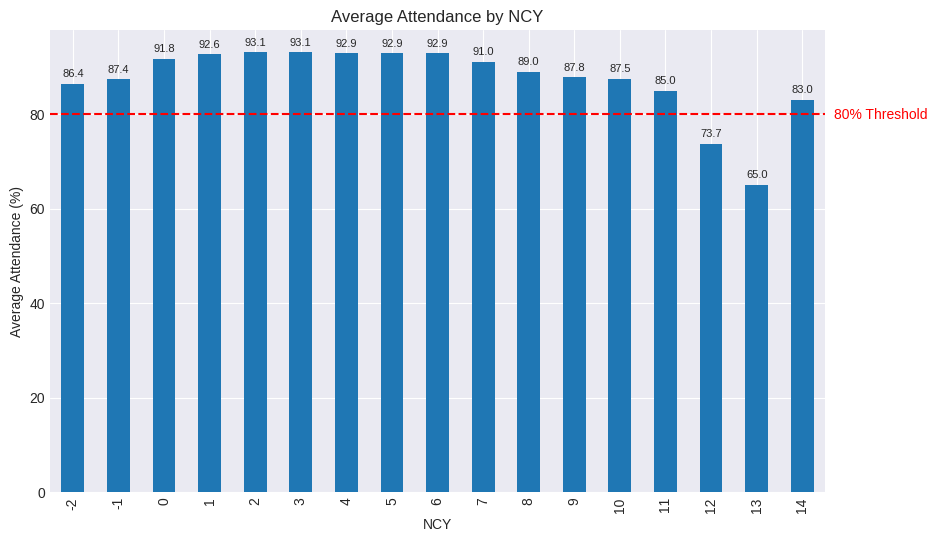

In [129]:
# average attendance by NCY and convert to percentage
attendance_by_ncy = df.groupby('NCYearActual')['PERCENTAGEATT'].mean() * 100  # Convert to percentage

fig, ax = plt.subplots(figsize=(10, 6))
attendance_by_ncy.plot(kind='bar', ax=ax)

for i, (idx, value) in enumerate(attendance_by_ncy.items()):
    ax.text(i, value + 1, f'{value:.1f}', ha='center', va='bottom', fontsize=8)

ax.axhline(y=80, color='r', linestyle='--')
ax.text(len(attendance_by_ncy) - 0.3, 79, '80% Threshold', color='r', ha='left')
ax.set_xlabel('NCY')
ax.set_ylabel('Average Attendance (%)')
ax.set_title('Average Attendance by NCY')
plt.show()

**Encode and Scale Dataframe**

In [130]:
# drop UPN feature
df.drop(columns=['Hashed_UPN'], inplace=True)

In [131]:
# encode non-numeric features using LabelEncoder
from sklearn.preprocessing import LabelEncoder

# non-numeric columns for label encoding
non_numeric_columns = ['Year', 'FSMeligible', 'DES_NO', 'Gender', 'Age', 'NCYearActual', 'Ethnicity', 'SENprovision', 'PostCode', 'EALAcquisition', 'Exclusion_Reason', 'Exclusion_Category', 'lsoa_code', 'LSOA Name (English)', 'Any_SEN',	'Any_EAL', 'Attendance_Category']

# label encoding for non-numeric columns
label_encoders = {}
for column in non_numeric_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [132]:
df.head()

,Year,DES_NO,Gender,NCYearActual,Ethnicity,SENprovision,FSMeligible,PostCode,EALAcquisition,Exclusion_Reason,Exclusion_Category,Exclusion_SessionsMissed,PERCENTAGEAUTH,PERCENTAGEUNAUTH,PERCENTAGEATT,PRESENT_SESS,POSSIBLE_SESS,MISS_SESS,AUTHORISED_SESS,UNAUTHORISED_SESS,lsoa_code,LSOA Name (English),WIMD 2019 LSOA Rank,WIMD 2019 Overall Decile,WIMD 2019 Overall Quintile,WIMD 2019 Overall Quartile,Age,Any_SEN,Any_EAL,Attendance_Category,WIMD 2019 LSOA Rank Bins,AttGroup,Exclusion
0,1,58,1,13,59,4,0,2676,0,4,1,0.0,0.0317,0.0159,0.9524,360.0,378.0,0.0,12.0,6.0,81,54,195.0,2.0,1.0,1.0,13,1,0,0,0,> 0.8,0
1,1,58,1,10,59,4,0,2148,0,4,1,0.0,0.0582,0.0000,0.9418,356.0,378.0,0.0,22.0,0.0,80,53,733.0,4.0,2.0,2.0,11,1,0,0,3,> 0.8,0
2,1,58,1,15,59,3,0,3160,0,4,1,0.0,0.0053,0.0582,0.9365,354.0,378.0,0.0,2.0,22.0,91,99,1671.0,9.0,5.0,4.0,15,0,0,0,8,> 0.8,0
3,1,58,1,14,59,3,0,3603,0,4,1,0.0,0.0000,0.0132,0.9868,375.0,380.0,0.0,0.0,5.0,127,308,1899.0,10.0,5.0,4.0,14,0,0,0,9,> 0.8,0
4,1,58,1,14,59,3,0,3293,0,4,1,0.0,0.0842,0.1184,0.7974,303.0,380.0,0.0,32.0,45.0,142,379,993.0,6.0,3.0,3.0,15,0,0,1,5,<= 0.8,0


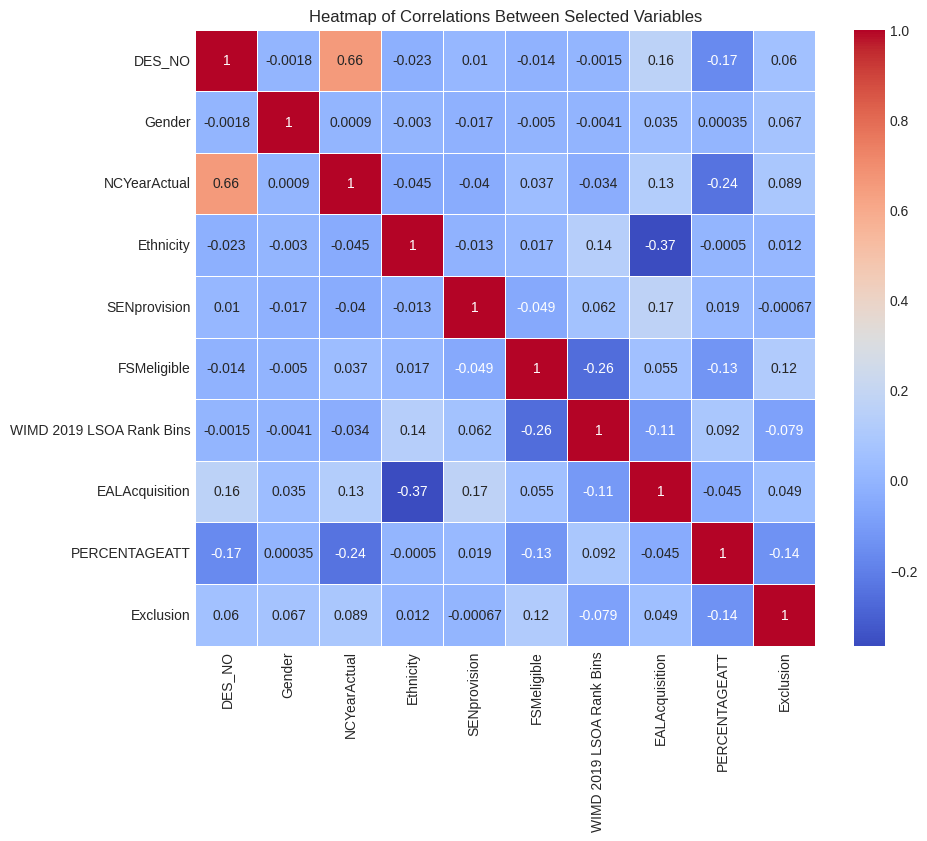

In [133]:
# correlation matrix heatmap
included_features = ['DES_NO', 'Gender', 'NCYearActual', 'Ethnicity', 'SENprovision', 'FSMeligible', 'WIMD 2019 LSOA Rank Bins', 'EALAcquisition', 'PERCENTAGEATT', 'Exclusion']
numeric_df = df[included_features].select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10, 8))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, cbar=True)
plt.title('Heatmap of Correlations Between Selected Variables')
plt.show()

In [134]:
# scale input features using MinMaxScalar (do not scale taget column i.e. AttGroup)

from sklearn.preprocessing import MinMaxScaler

# initialize MinMaxScaler
scaler = MinMaxScaler()

# numerical columns for scaling
numerical_columns = [col for col in df.columns if df[col].dtype != 'object' and col != 'AttGroup']
df_numerical = df[numerical_columns]

# fit and transform the numerical data
scaled_numerical_data = scaler.fit_transform(df_numerical)

# DataFrame with the scaled numerical data
df_scaled_numerical = pd.DataFrame(scaled_numerical_data, columns=df_numerical.columns)

# concatenate the scaled numerical data with the non-scaled columns
df_scaled_numerical.reset_index(drop=True, inplace=True)
df.reset_index(drop=True, inplace=True)
df_scaled = pd.concat([df_scaled_numerical, df[['AttGroup']]], axis=1)


In [135]:
df_scaled.head()

,Year,DES_NO,Gender,NCYearActual,Ethnicity,SENprovision,FSMeligible,PostCode,EALAcquisition,Exclusion_Reason,Exclusion_Category,Exclusion_SessionsMissed,PERCENTAGEAUTH,PERCENTAGEUNAUTH,PERCENTAGEATT,PRESENT_SESS,POSSIBLE_SESS,MISS_SESS,AUTHORISED_SESS,UNAUTHORISED_SESS,lsoa_code,LSOA Name (English),WIMD 2019 LSOA Rank,WIMD 2019 Overall Decile,WIMD 2019 Overall Quintile,WIMD 2019 Overall Quartile,Age,Any_SEN,Any_EAL,Attendance_Category,WIMD 2019 LSOA Rank Bins,Exclusion,AttGroup
0,0.111111,0.966667,1.0,0.8125,0.648352,0.8,0.0,0.632624,0.0,0.333333,0.5,0.0,0.0317,0.0159,0.9524,0.675422,0.50000,0.0,0.031662,0.016086,0.192857,0.128571,0.099895,0.111111,0.00,0.000000,0.722222,1.0,0.0,0.0,0.000000,0.0,> 0.8
1,0.111111,0.966667,1.0,0.6250,0.648352,0.8,0.0,0.507801,0.0,0.333333,0.5,0.0,0.0582,0.0000,0.9418,0.667917,0.50000,0.0,0.058047,0.000000,0.190476,0.126190,0.382755,0.333333,0.25,0.333333,0.611111,1.0,0.0,0.0,0.333333,0.0,> 0.8
2,0.111111,0.966667,1.0,0.9375,0.648352,0.6,0.0,0.747045,0.0,0.333333,0.5,0.0,0.0053,0.0582,0.9365,0.664165,0.50000,0.0,0.005277,0.058981,0.216667,0.235714,0.875920,0.888889,1.00,1.000000,0.833333,0.0,0.0,0.0,0.888889,0.0,> 0.8
3,0.111111,0.966667,1.0,0.8750,0.648352,0.6,0.0,0.851773,0.0,0.333333,0.5,0.0,0.0000,0.0132,0.9868,0.703565,0.50266,0.0,0.000000,0.013405,0.302381,0.733333,0.995794,1.000000,1.00,1.000000,0.777778,0.0,0.0,0.0,1.000000,0.0,> 0.8
4,0.111111,0.966667,1.0,0.8750,0.648352,0.6,0.0,0.778487,0.0,0.333333,0.5,0.0,0.0842,0.1184,0.7974,0.568480,0.50266,0.0,0.084433,0.120643,0.338095,0.902381,0.519453,0.555556,0.50,0.666667,0.833333,0.0,0.0,1.0,0.555556,0.0,<= 0.8


In [136]:
# checking the unique values in the AttGroup column before renaming and transforming
print("Unique values in AttGroup column before transformation:")
print(df_scaled['AttGroup'].unique())

Unique values in AttGroup column before transformation:
['> 0.8', '<= 0.8']
Categories (2, object): ['<= 0.8' < '> 0.8']


In [137]:
# rename the target feature and applying transofrmation
df_scaled.rename(columns={'AttGroup': 'Persistent_Absence'}, inplace=True)
df_scaled['Persistent_Absence'] = df_scaled['Persistent_Absence'].apply(lambda x: 0 if x == '> 0.8' else 1)

# checking unique values after transformation and conversion to float
print("Unique values in Persistent_Absence column after transformation:")
print(df_scaled['Persistent_Absence'].unique())

df_scaled['Persistent_Absence'] = df_scaled['Persistent_Absence'].astype(float)

Unique values in Persistent_Absence column after transformation:
[0, 1]
Categories (2, int64): [1 < 0]


In [138]:
df_scaled.head()

,Year,DES_NO,Gender,NCYearActual,Ethnicity,SENprovision,FSMeligible,PostCode,EALAcquisition,Exclusion_Reason,Exclusion_Category,Exclusion_SessionsMissed,PERCENTAGEAUTH,PERCENTAGEUNAUTH,PERCENTAGEATT,PRESENT_SESS,POSSIBLE_SESS,MISS_SESS,AUTHORISED_SESS,UNAUTHORISED_SESS,lsoa_code,LSOA Name (English),WIMD 2019 LSOA Rank,WIMD 2019 Overall Decile,WIMD 2019 Overall Quintile,WIMD 2019 Overall Quartile,Age,Any_SEN,Any_EAL,Attendance_Category,WIMD 2019 LSOA Rank Bins,Exclusion,Persistent_Absence
0,0.111111,0.966667,1.0,0.8125,0.648352,0.8,0.0,0.632624,0.0,0.333333,0.5,0.0,0.0317,0.0159,0.9524,0.675422,0.50000,0.0,0.031662,0.016086,0.192857,0.128571,0.099895,0.111111,0.00,0.000000,0.722222,1.0,0.0,0.0,0.000000,0.0,0.0
1,0.111111,0.966667,1.0,0.6250,0.648352,0.8,0.0,0.507801,0.0,0.333333,0.5,0.0,0.0582,0.0000,0.9418,0.667917,0.50000,0.0,0.058047,0.000000,0.190476,0.126190,0.382755,0.333333,0.25,0.333333,0.611111,1.0,0.0,0.0,0.333333,0.0,0.0
2,0.111111,0.966667,1.0,0.9375,0.648352,0.6,0.0,0.747045,0.0,0.333333,0.5,0.0,0.0053,0.0582,0.9365,0.664165,0.50000,0.0,0.005277,0.058981,0.216667,0.235714,0.875920,0.888889,1.00,1.000000,0.833333,0.0,0.0,0.0,0.888889,0.0,0.0
3,0.111111,0.966667,1.0,0.8750,0.648352,0.6,0.0,0.851773,0.0,0.333333,0.5,0.0,0.0000,0.0132,0.9868,0.703565,0.50266,0.0,0.000000,0.013405,0.302381,0.733333,0.995794,1.000000,1.00,1.000000,0.777778,0.0,0.0,0.0,1.000000,0.0,0.0
4,0.111111,0.966667,1.0,0.8750,0.648352,0.6,0.0,0.778487,0.0,0.333333,0.5,0.0,0.0842,0.1184,0.7974,0.568480,0.50266,0.0,0.084433,0.120643,0.338095,0.902381,0.519453,0.555556,0.50,0.666667,0.833333,0.0,0.0,1.0,0.555556,0.0,1.0


In [139]:
# check the unique values in the Persistent_Absence column after renaming and transforming
print("Unique values in AttGroup column after transformation:")
print(df_scaled['Persistent_Absence'].unique())

Unique values in AttGroup column after transformation:
[0. 1.]


In [140]:
# drop Exclusion and Attendance features prior to machine learning to avoid over-fitting
df_scaled.drop(columns=['Attendance_Category','Exclusion_Category',	'Exclusion_SessionsMissed',	'PERCENTAGEAUTH',	'PERCENTAGEUNAUTH',	'PERCENTAGEATT',	'PRESENT_SESS',	'POSSIBLE_SESS',	'MISS_SESS',	'AUTHORISED_SESS','UNAUTHORISED_SESS','Exclusion'], inplace=True)

In [141]:
df_scaled.head()

,Year,DES_NO,Gender,NCYearActual,Ethnicity,SENprovision,FSMeligible,PostCode,EALAcquisition,Exclusion_Reason,lsoa_code,LSOA Name (English),WIMD 2019 LSOA Rank,WIMD 2019 Overall Decile,WIMD 2019 Overall Quintile,WIMD 2019 Overall Quartile,Age,Any_SEN,Any_EAL,WIMD 2019 LSOA Rank Bins,Persistent_Absence
0,0.111111,0.966667,1.0,0.8125,0.648352,0.8,0.0,0.632624,0.0,0.333333,0.192857,0.128571,0.099895,0.111111,0.00,0.000000,0.722222,1.0,0.0,0.000000,0.0
1,0.111111,0.966667,1.0,0.6250,0.648352,0.8,0.0,0.507801,0.0,0.333333,0.190476,0.126190,0.382755,0.333333,0.25,0.333333,0.611111,1.0,0.0,0.333333,0.0
2,0.111111,0.966667,1.0,0.9375,0.648352,0.6,0.0,0.747045,0.0,0.333333,0.216667,0.235714,0.875920,0.888889,1.00,1.000000,0.833333,0.0,0.0,0.888889,0.0
3,0.111111,0.966667,1.0,0.8750,0.648352,0.6,0.0,0.851773,0.0,0.333333,0.302381,0.733333,0.995794,1.000000,1.00,1.000000,0.777778,0.0,0.0,1.000000,0.0
4,0.111111,0.966667,1.0,0.8750,0.648352,0.6,0.0,0.778487,0.0,0.333333,0.338095,0.902381,0.519453,0.555556,0.50,0.666667,0.833333,0.0,0.0,0.555556,1.0


##4. Machine Learning Models

In [142]:
### logistic regression model

# making 'Persistent_Absence' is the target variable
X = df_scaled.drop(columns=['Persistent_Absence'])
y = df_scaled['Persistent_Absence']

# splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [143]:
# distribution of the target variable
class_distribution = df_scaled['Persistent_Absence'].value_counts()
print("Class Distribution:\n", class_distribution)

Class Distribution:
 Persistent_Absence
0.0    184790
1.0     27542
Name: count, dtype: int64


In [144]:
# logistic regression model creation
log_reg = LogisticRegression()

# train the model
log_reg.fit(X_train, y_train)

# make predictions
y_pred = log_reg.predict(X_test)

# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
coefficients = pd.DataFrame(log_reg.coef_, columns=X.columns)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("Model Coefficients:\n", coefficients)

Accuracy: 0.871311842136247
Confusion Matrix:
 [[36920    66]
 [ 5399    82]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      1.00      0.93     36986
         1.0       0.55      0.01      0.03      5481

    accuracy                           0.87     42467
   macro avg       0.71      0.51      0.48     42467
weighted avg       0.83      0.87      0.81     42467

Model Coefficients:
        Year    DES_NO   Gender  NCYearActual  Ethnicity  SENprovision  \
0  0.499534 -0.063932 -0.04407      2.789211    -0.0427      0.200844   

   FSMeligible  PostCode  EALAcquisition  Exclusion_Reason  lsoa_code  \
0     0.625568  0.173588       -0.635441          1.541598   0.015977   

   LSOA Name (English)  WIMD 2019 LSOA Rank  WIMD 2019 Overall Decile  \
0             0.112676            -0.171887                 -0.305607   

   WIMD 2019 Overall Quintile  WIMD 2019 Overall Quartile       Age   Any_SEN  \
0                   -0.24034

In [145]:
# split the data again to ensure no data leakage
X = df_scaled.drop(columns=['Persistent_Absence'])
y = df_scaled['Persistent_Absence']

# apply L2 regularization (Ridge)
log_reg = LogisticRegression(solver='lbfgs', penalty='l2', max_iter=1000)

# perform cross-validation
cv_scores = cross_val_score(log_reg, X, y, cv=5)

print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

Cross-validation scores: [0.87022865 0.86959286 0.86999011 0.87055527 0.87465266]
Mean cross-validation score: 0.8710039098501932


In [146]:
# defining the parameter grid for logistic regression
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}

# initialising the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)

# setting up the GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')

# fitting the model to the data
grid_search.fit(X, y)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-validation Accuracy:", grid_search.best_score_)

Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Cross-validation Accuracy: 0.8710133294830434


ROC-AUC Score: 0.7200750691497113


<ipython-input-147-3107cf0130ed>:15: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


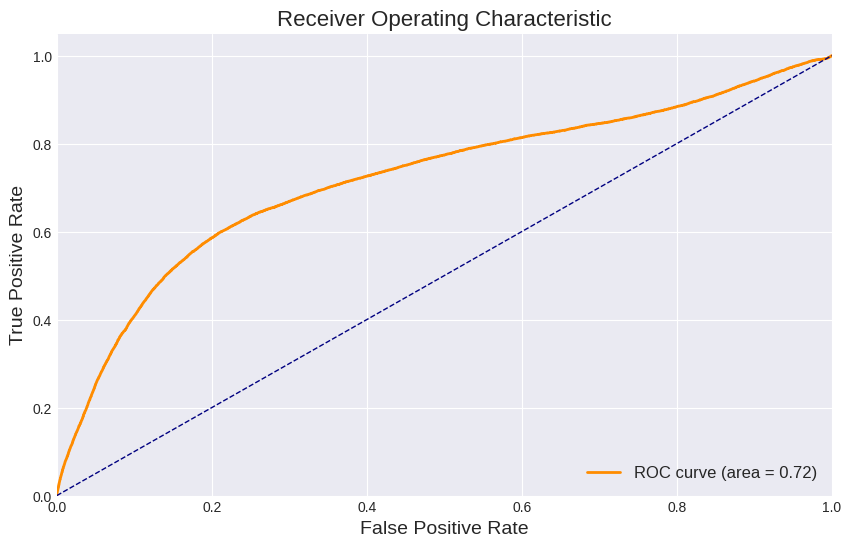

In [147]:
# fit the model
final_model = LogisticRegression(C=grid_search.best_params_['C'], penalty='l2', solver='lbfgs', max_iter=1000)
final_model.fit(X, y)

# predicting probabilities for the test set
y_pred_proba = final_model.predict_proba(X)[:, 1]

# calculating the ROC-AUC score
roc_auc = roc_auc_score(y, y_pred_proba)
print("ROC-AUC Score:", roc_auc)

# computing and plotting the ROC curve
fpr_logistic, tpr_logistic, thresholds = roc_curve(y, y_pred_proba)

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(10, 6))
plt.plot(fpr_logistic, tpr_logistic, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic', fontsize=16)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True)
plt.show()

In [148]:
!pip install shap

/usr/local/lib/python3.10/dist-packages/shap/explainers/_linear.py:95: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


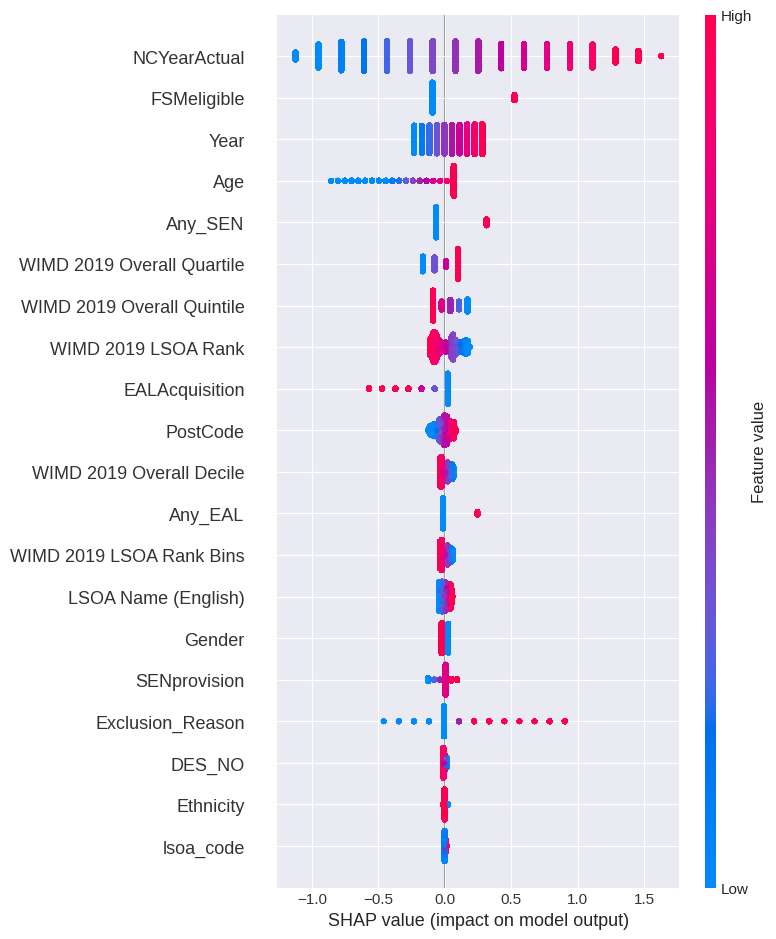

In [149]:
# initialising and plotting the SHAP explainer
explainer = shap.LinearExplainer(final_model, X, feature_perturbation="interventional")
shap_values = explainer.shap_values(X)

shap.summary_plot(shap_values, X)

##5. Artificial Neural Network (ANN) Classification

In [150]:
# print Tensor Flow version
print(tf.__version__)

2.15.0


In [151]:
!pip install keras-tuner

In [152]:
### define Confusion Matrix and Performance Evaluation Metrics

def performance():
    confusion = metrics.confusion_matrix(y_test, y_pred)

    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]

    accuracy = (TP+TN)/(TP+TN+FP+FN)
    precision = (TP)/(TP+FP)
    recall = (TP)/(TP+FN)
    classification_error = (FP + FN) / float(TP + TN + FP + FN)
    sensitivity = TP / float(FN + TP)
    specificity = TN / (TN + FP)
    false_positive_rate = FP / float(TN + FP)
    F1_score = 2*((precision*sensitivity)/(precision+sensitivity))

    print('Accuracy: ' + str(accuracy))
    print('Precision: ' + str(precision))
    print('Recall: ' + str(recall))
    print('Classification_error: ' + str(classification_error))
    print('Sensitivity: ' + str(sensitivity))
    print('Specificity: ' + str(specificity))
    print('False_positive_rate: ' + str(false_positive_rate))
    print('F1_score: ' + str(F1_score))
    print(confusion)

    # AUC and ROC
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

    print("AUC Score:", roc_auc)

In [153]:
### ANN Hyper-parameter tuning

# filter ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# subsample the data
X_sample = X.sample(n=40000, random_state=42)
y_sample = y[X_sample.index]

# defining parameter distribution
param_dist = {
    'hidden_layer_sizes': [(10,), (20,), (30,)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam'],
    'alpha': uniform(0.0001, 0.001),  # Narrower range for alpha
}

# initialising the MLP classifier
mlp_classifier = MLPClassifier(max_iter=500, random_state=42)

# perform Randomized Search with fewer iterations
n_iter_search = 5
random_search = RandomizedSearchCV(mlp_classifier, param_distributions=param_dist, n_iter=n_iter_search, cv=3, scoring='accuracy', n_jobs=-1, random_state=42)

start_time = time.time()
random_search.fit(X_sample, y_sample)
elapsed_time = time.time() - start_time

# estimate total time
estimated_total_time = (elapsed_time / n_iter_search) * 20  # Extrapolate to 20 iterations
print(f"Elapsed time for {n_iter_search} iterations: {elapsed_time:.2f} seconds")
print(f"Estimated total time for 20 iterations: {estimated_total_time:.2f} seconds")

# identifying best parameters and best score
best_params = random_search.best_params_
best_score = random_search.best_score_
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# best model evaluation
best_model = random_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Elapsed time for 5 iterations: 265.18 seconds
Estimated total time for 20 iterations: 1060.71 seconds
Best Parameters: {'activation': 'relu', 'alpha': 0.0005458327528535912, 'hidden_layer_sizes': (30,), 'solver': 'adam'}
Best Score: 0.8821999892280193
Test Accuracy: 0.8836743824616762


In [154]:
# refit the best model on the full dataset
best_model_full_data = MLPClassifier(
    hidden_layer_sizes=best_params['hidden_layer_sizes'],
    activation=best_params['activation'],
    solver=best_params['solver'],
    alpha=best_params['alpha'],
    max_iter=1000,  # Increase max_iter for the final model
    random_state=42
)

best_model_full_data.fit(X, y)
final_accuracy = best_model_full_data.score(X_test, y_test)
print("Final Test Accuracy on Full Data:", final_accuracy)

Final Test Accuracy on Full Data: 0.8828031177149316


Accuracy: 0.8828031177149316
Precision: 0.6155963302752293
Recall: 0.2448458310527276
Classification_error: 0.11719688228506842
Specificity: 0.9773427783485643
False_positive_rate: 0.022657221651435678
F1_score: 0.35034590784492886
Confusion Matrix:
 [[36148   838]
 [ 4139  1342]]


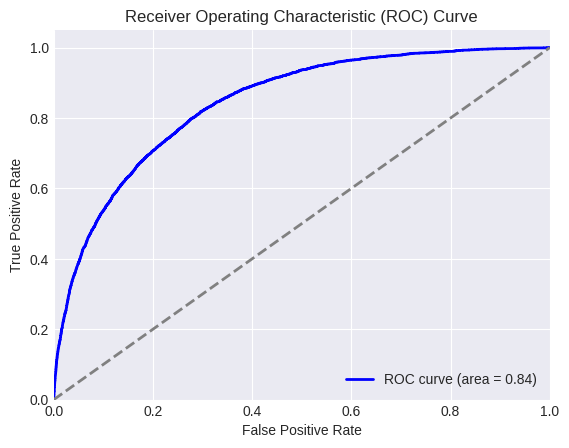

In [155]:
# predict on test data
y_pred = best_model_full_data.predict(X_test)
y_prob = best_model_full_data.predict_proba(X_test)[:, 1]

# calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

# classification error
classification_error = 1 - accuracy

# sensitivity and specificity
sensitivity = recall  # Same as recall
tn, fp, fn, tp = confusion.ravel()
specificity = tn / (tn + fp)

# false positive rate
false_positive_rate = fp / (fp + tn)

# ROC AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

# print metrics
print('Accuracy: ' + str(accuracy))
print('Precision: ' + str(precision))
print('Recall: ' + str(recall))
print('Classification_error: ' + str(classification_error))
print('Specificity: ' + str(specificity))
print('False_positive_rate: ' + str(false_positive_rate))
print('F1_score: ' + str(f1))
print('Confusion Matrix:\n', confusion)

# plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

<ipython-input-156-8ad8f2c55e08>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


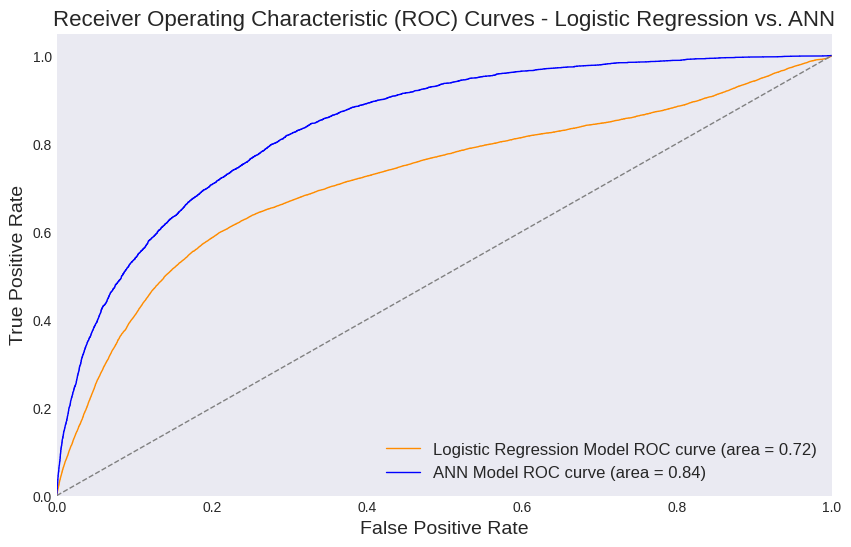

In [156]:
# overlay logistic regression ROC with ANN ROC

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(10, 6))
plt.plot(fpr_logistic, tpr_logistic, color='darkorange', lw=1, label=f'Logistic Regression Model ROC curve (area = {roc_auc:.2f})')
plt.plot(fpr, tpr, color='blue', lw=1, label=f'ANN Model ROC curve (area = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=1, linestyle='--')
plt.grid(False, which='both', axis='both')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curves - Logistic Regression vs. ANN', fontsize=16)
plt.legend(loc="lower right", fontsize=12)
plt.show()